### Bike inc. is a bicycle and related accessories manufacturing company with branches across Europe and the United States. Management wants a comprehensive analysis to understand consumer spending habits and differences in cost & revenue across different markets in order to find growth opportunities. The intention is to increase profit margin by 20% over the next year.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
import datetime as dt
from datetime import datetime
from statsmodels.formula.api import ols

**DATA OUTLINE**

In [31]:
bike_sales=pd.read_csv('/Users/chiladabale/Desktop/Data Analytics/SpringBoard/Capstone II/Bike Sales.csv')
bike_sales.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [5]:
bike_sales.isnull().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [6]:
bike_sales.shape

(34867, 16)

In [7]:
bike_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

**DATA CLEANING AND PRE-PROCESSING**

In [34]:
bike_sales.drop('Column1', axis='columns', inplace=True)


In [6]:
bike_sales.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,1,2/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2,2/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3,3/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,4,3/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [32]:
bike_sales.columns = bike_sales.columns.str.replace(' ', '_')

In [35]:
bike_sales.dropna(subset=['Date', 'Year','Month'], inplace=True)

In [15]:
bike_sales.isnull().sum()

index                   0
Date                    0
Year                    0
Month                   0
Customer Age            0
Customer Gender         0
Country                 0
State                   0
Product Category        0
Sub Category            0
Quantity                0
Unit Cost               0
Unit Price              0
Cost                    0
Revenue                 0
Column1             32292
dtype: int64

In [27]:
bike_sales.shape

(34866, 15)

In [28]:
bike_sales.dtypes

index                 int64
Date                 object
Year                float64
Month                object
Customer_Age        float64
Customer_Gender      object
Country              object
State                object
Product_Category     object
Sub_Category         object
Quantity            float64
Unit_Cost           float64
Unit_Price          float64
Cost                float64
Revenue             float64
dtype: object

In [36]:
bike_sales.Date.str.replace('/', '-')

0        2-19-16
1        2-20-16
2        2-27-16
3        3-12-16
4        3-12-16
          ...   
34861    3-22-15
34862     2-7-16
34863    3-13-15
34864     4-5-15
34865    8-30-15
Name: Date, Length: 34866, dtype: object

In [37]:
bike_sales['Date']=pd.to_datetime(bike_sales['Date'],format='mixed')

In [38]:
bike_sales['Date'].dtypes

dtype('<M8[ns]')

In [11]:
bike_sales['Date']

0       2016-02-19
1       2016-02-20
2       2016-02-27
3       2016-03-12
4       2016-03-12
           ...    
34861   2015-03-22
34862   2016-02-07
34863   2015-03-13
34864   2015-04-05
34865   2015-08-30
Name: Date, Length: 34866, dtype: datetime64[ns]

In [ ]:
bike_sales['Month']=bike_sales['Month'].dt.strftime('%B')

In [39]:
bike_sales['#_Month']=bike_sales['Date'].dt.strftime('%m')

In [40]:
bike_sales['Year_Month'] = bike_sales['Date'].dt.strftime('%Y-%m')

In [20]:
bike_sales.describe()


,index,Date,Year,Customer_Age,Quantity,Unit_Cost,Unit_Price,Cost,Revenue
count,34866.000000,34866,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,17432.500000,2016-01-19 18:35:05.110996224,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870074
min,0.000000,2015-01-01 00:00:00,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000
25%,8716.250000,2015-10-26 00:00:00,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000
50%,17432.500000,2016-01-28 00:00:00,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000
75%,26148.750000,2016-04-26 00:00:00,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000
max,34865.000000,2016-07-31 00:00:00,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000
std,10065.091579,NaN,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.650597


In [36]:
bike_sales.describe(include=object)

,Month,Customer_Gender,Country,State,Product_Category,Sub_Category
count,34866,34866,34866,34866,34866,34866
unique,12,2,4,45,3,17
top,June,M,United States,California,Accessories,Tires and Tubes
freq,3680,17805,18076,10332,22534,11112


In [18]:
bike_sales.head()

,index,Date,Year,Month,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Quantity,Unit_Cost,Unit_Price,Cost,Revenue,#_Month
0,0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,02
1,1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,02
2,2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,02
3,3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,03
4,4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,03


**DATA DETAILS**

##### How many National Markets are there?

In [29]:
bike_sales['Country'].unique()

array(['United States', 'France', 'United Kingdom', 'Germany'],
      dtype=object)

##### What are the product categories?

In [41]:
bike_sales['Product_Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

##### What are the sub categories?

In [44]:
bike_sales['Sub_Category'].unique()

array(['Tires and Tubes', 'Gloves', 'Helmets', 'Bike Stands',
       'Mountain Bikes', 'Hydration Packs', 'Jerseys', 'Fenders',
       'Cleaners', 'Socks', 'Caps', 'Touring Bikes', 'Bottles and Cages',
       'Vests', 'Road Bikes', 'Bike Racks', 'Shorts'], dtype=object)

**DATA ANALYSIS AND VISUALIZATION**

##### Creating a Gross Profit Column

In [45]:
bike_sales['Gross_Profit']=bike_sales.Revenue-bike_sales.Cost

###### A brief general overview of the number of observations 

In [86]:
bike_sales.Customer_Gender. value_counts(normalize=True)

Customer_Gender
M    0.510669
F    0.489331
Name: proportion, dtype: float64

In [19]:
bike_sales.Country.value_counts(normalize=True)

Country
United States     0.518442
United Kingdom    0.184162
Germany           0.149171
France            0.148225
Name: proportion, dtype: float64

In [20]:
bike_sales.Product_Category.value_counts(normalize=True)

Product_Category
Accessories    0.646303
Bikes          0.203436
Clothing       0.150261
Name: proportion, dtype: float64

In [37]:
bike_sales.Sub_Category.value_counts(normalize=True)

Sub_Category
Tires and Tubes      0.318706
Bottles and Cages    0.151867
Helmets              0.119773
Road Bikes           0.086675
Mountain Bikes       0.078501
Jerseys              0.057362
Caps                 0.043509
Touring Bikes        0.038261
Fenders              0.021855
Shorts               0.016234
Cleaners             0.015631
Gloves               0.013767
Hydration Packs      0.011358
Socks                0.010440
Vests                0.008949
Bike Stands          0.004159
Bike Racks           0.002954
Name: proportion, dtype: float64

##### Analysing Revenue & Gross Profit by Country

In [24]:
bike_sales.groupby('Country').Revenue.sum().sort_values(ascending=False)

Country
United States     10377742.0
United Kingdom     4276220.0
Germany            4244510.0
France             3446104.0
Name: Revenue, dtype: float64

In [21]:
(bike_sales.groupby('Country').Revenue.sum().sort_values(ascending=False)/bike_sales.Revenue.sum())*100

Country
United States     46.444121
United Kingdom    19.137620
Germany           18.995706
France            15.422553
Name: Revenue, dtype: float64

In [283]:
(bike_sales.groupby('Country').Cost.sum().sort_values(ascending=False)/bike_sales.Cost.sum())*100

Country
United States     48.182988
United Kingdom    19.654783
Germany           16.360550
France            15.801679
Name: Cost, dtype: float64

In [108]:
(bike_sales.groupby('Country').Gross_Profit.sum().sort_values(ascending=False)/bike_sales.Revenue.sum())*100

Country
Germany           4.291086
United States     3.137965
United Kingdom    1.472192
France            1.220238
Name: Gross_Profit, dtype: float64

In [98]:
ctr_rev=bike_sales.groupby('Country').Revenue.sum().sort_values(ascending=False)
ctr_profit=bike_sales.groupby('Country').Gross_Profit.sum().sort_values(ascending=False)
ctr_rev=pd.DataFrame(ctr_rev)
ctr_profit=pd.DataFrame(ctr_profit)

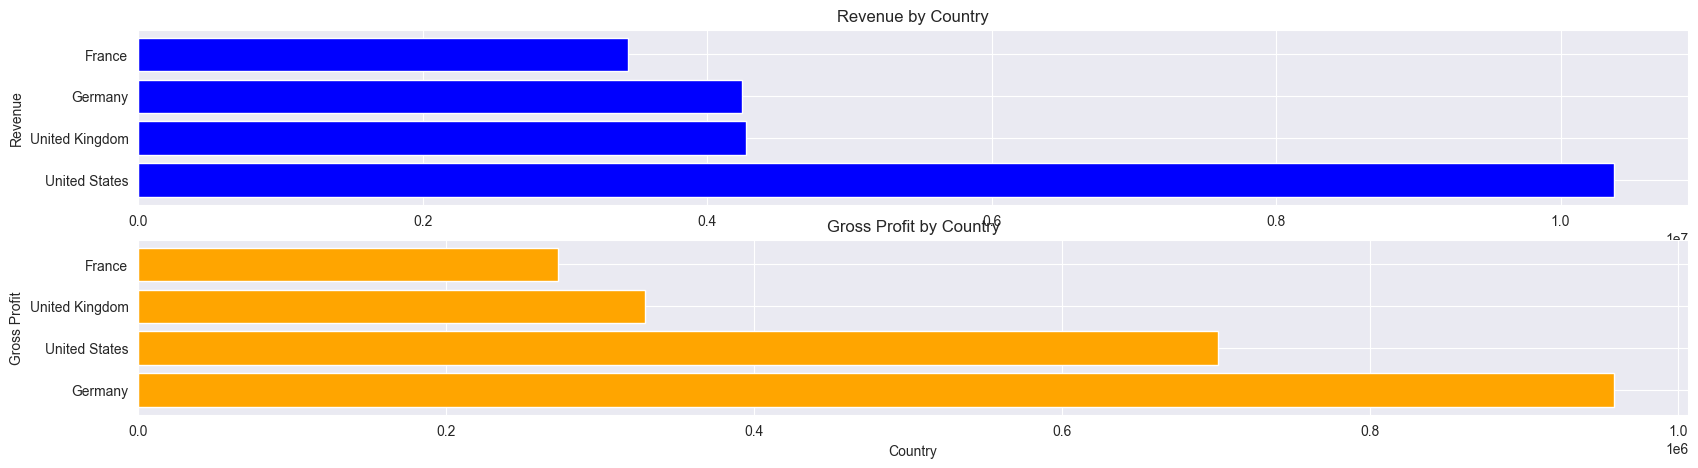

In [277]:
fig, ax=plt.subplots(2,1)


ax[0].barh(ctr_rev.index,ctr_rev['Revenue'], color='b')
ax[0].set_ylabel('Revenue')
ax[0].set_title('Revenue by Country')



ax[1].barh(ctr_profit.index,ctr_profit['Gross_Profit'], color='orange')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Gross Profit')
ax[1].set_title('Gross Profit by Country')

plt.show()

- **The United States has asignificanly greater revenue**
- **Germany has a significantly higher Gross Profit**

##### Analysing Revenue and Gross Profit by Product Category

In [43]:
bike_sales.groupby('Product_Category').Revenue.sum().sort_values(ascending=False)/bike_sales.Revenue.sum()*100


Product_Category
Bikes          51.405563
Accessories    33.210136
Clothing       15.384302
Name: Revenue, dtype: float64

In [48]:
cat_rev=bike_sales.groupby('Product_Category').Revenue.sum().sort_values(ascending=False)
cat_profit=bike_sales.groupby('Product_Category').Gross_Profit.sum().sort_values(ascending=False)


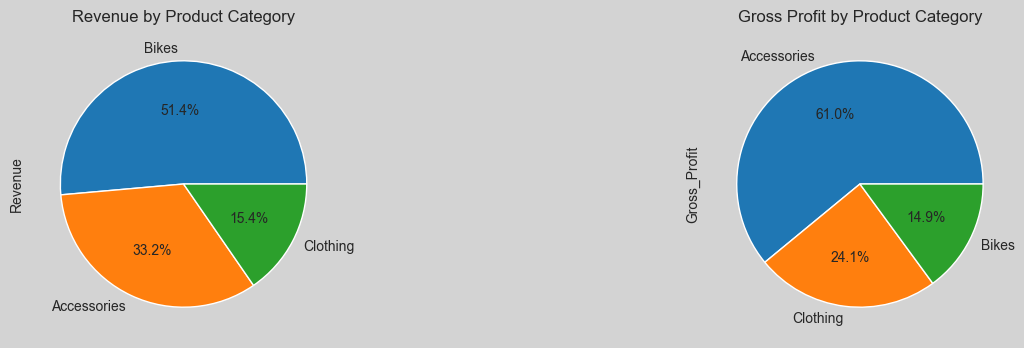

In [49]:
plt.figure(figsize = (16,4), facecolor='lightgrey')
plt.subplot(1,2,1, title='Revenue by Product Category')
cat_rev.plot.pie(autopct='%1.1f%%')

plt.subplot(1,2,2, title='Gross Profit by Product Category')
cat_profit.plot.pie(autopct='%1.1f%%')
plt.show()

-  **Although Bikes contribute more than half (51.4%) of revenue, They contriute only 15% towards Gross Profit**
-  **Contributing 61% Accessories are by fat the largest contributor towards Gross Profit even though they contribute only 33% towards Revenue**

##### Analysing Revenue and Gross Profit by Sub-Category

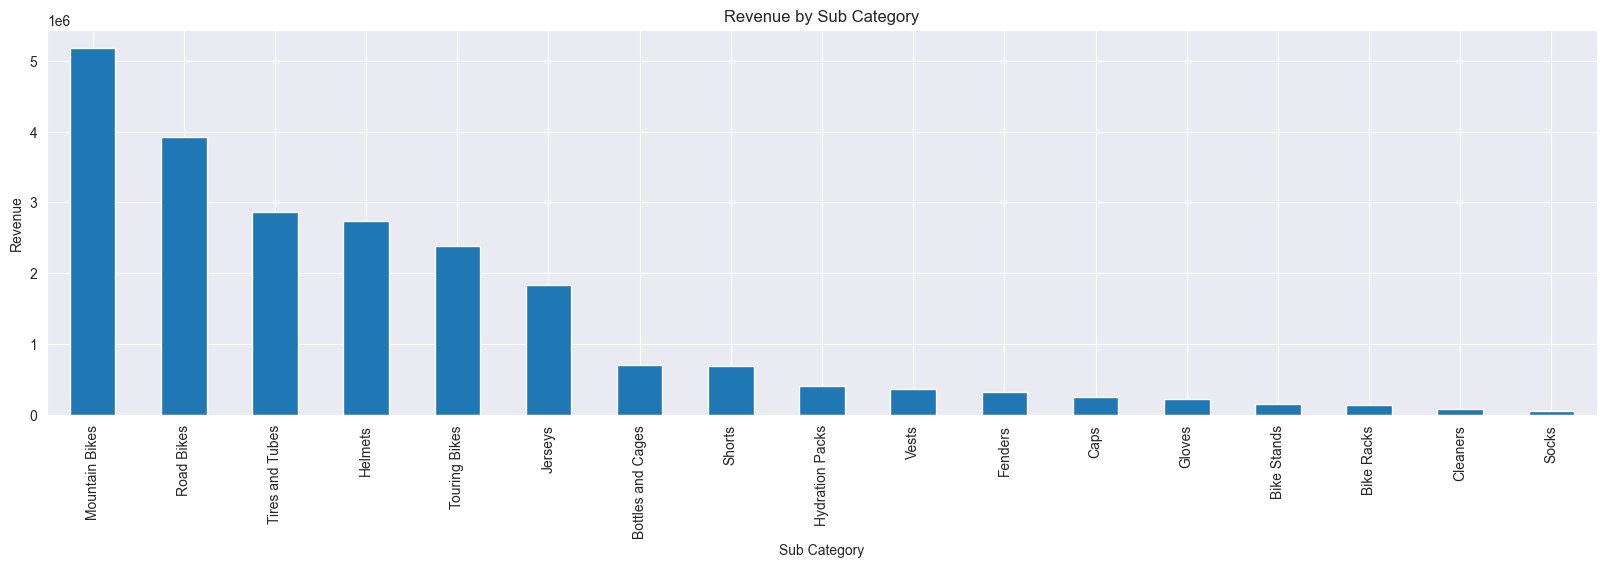

In [275]:
sub_rev=bike_sales.groupby('Sub_Category').Revenue.sum().sort_values(ascending=False)
sub_rev.plot(kind='bar')
plt.xlabel('Sub Category')
plt.ylabel('Revenue')
plt.title('Revenue by Sub Category')
plt.show()

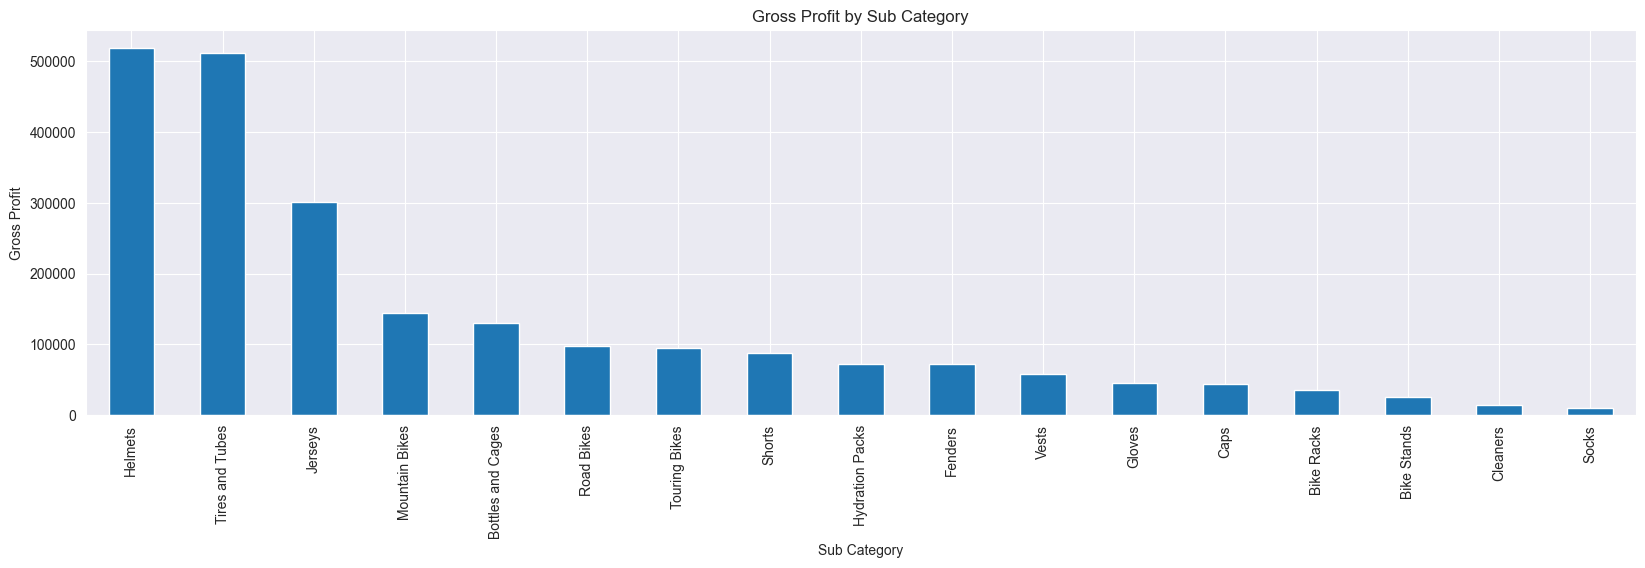

In [274]:
sub_profit=bike_sales.groupby('Sub_Category').Gross_Profit.sum().sort_values(ascending=False)
sub_profit.plot(kind='bar')
plt.xlabel('Sub Category')
plt.ylabel('Gross Profit')
plt.title('Gross Profit by Sub Category')
plt.show()

-  **Even though Mountain Bike and Road bikes account for the top two subcatagories interms of  Revenue,** 
   **Helmets, Tires & Tubes are the top two subcatagories interms of Gross Profit**

##### Gross-Profit by Country along Product Category and  Sub-Categories

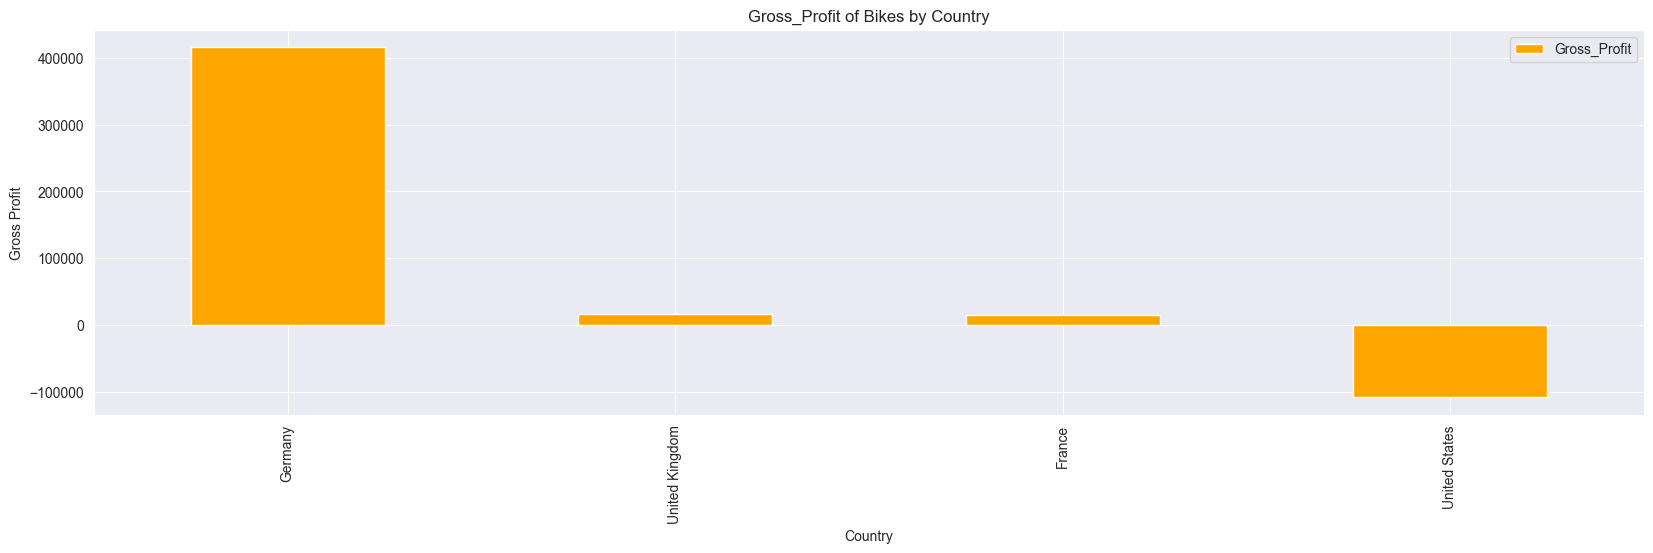

In [56]:
bikes=bike_sales[bike_sales.Sub_Category.isin(['Mountain Bikes', 'Road Bikes', 'Touring Bikes'])]
bikes_cost=pd.DataFrame(bikes.groupby('Country').Gross_Profit.sum().sort_values(ascending=False))
bikes_cost.plot.bar(color='orange')
plt.title('Gross_Profit of Bikes by Country')
plt.ylabel('Gross Profit')
plt.show()

-  **Germany has by far the highest Profit Margin from bikes (product category) while the US has incurred a net loss from bikes.**

In [53]:
bikes_s_u=bike_sales.loc[bike_sales['Country']=='United States']
bike_us=bikes_s_u.groupby('Sub_Category').Gross_Profit.sum().sort_values(ascending=False)

bikes_s_g=bike_sales.loc[bike_sales['Country']=='Germany']
bike_ger=bikes_s_g.groupby('Sub_Category').Gross_Profit.sum().sort_values(ascending=False)

bikes_s_uk=bike_sales.loc[bike_sales['Country']=='United Kingdom']
bike_uk=bikes_s_uk.groupby('Sub_Category').Gross_Profit.sum().sort_values(ascending=False)

bikes_s_f=bike_sales.loc[bike_sales['Country']=='France']
bike_fr=bikes_s_f.groupby('Sub_Category').Gross_Profit.sum().sort_values(ascending=False)


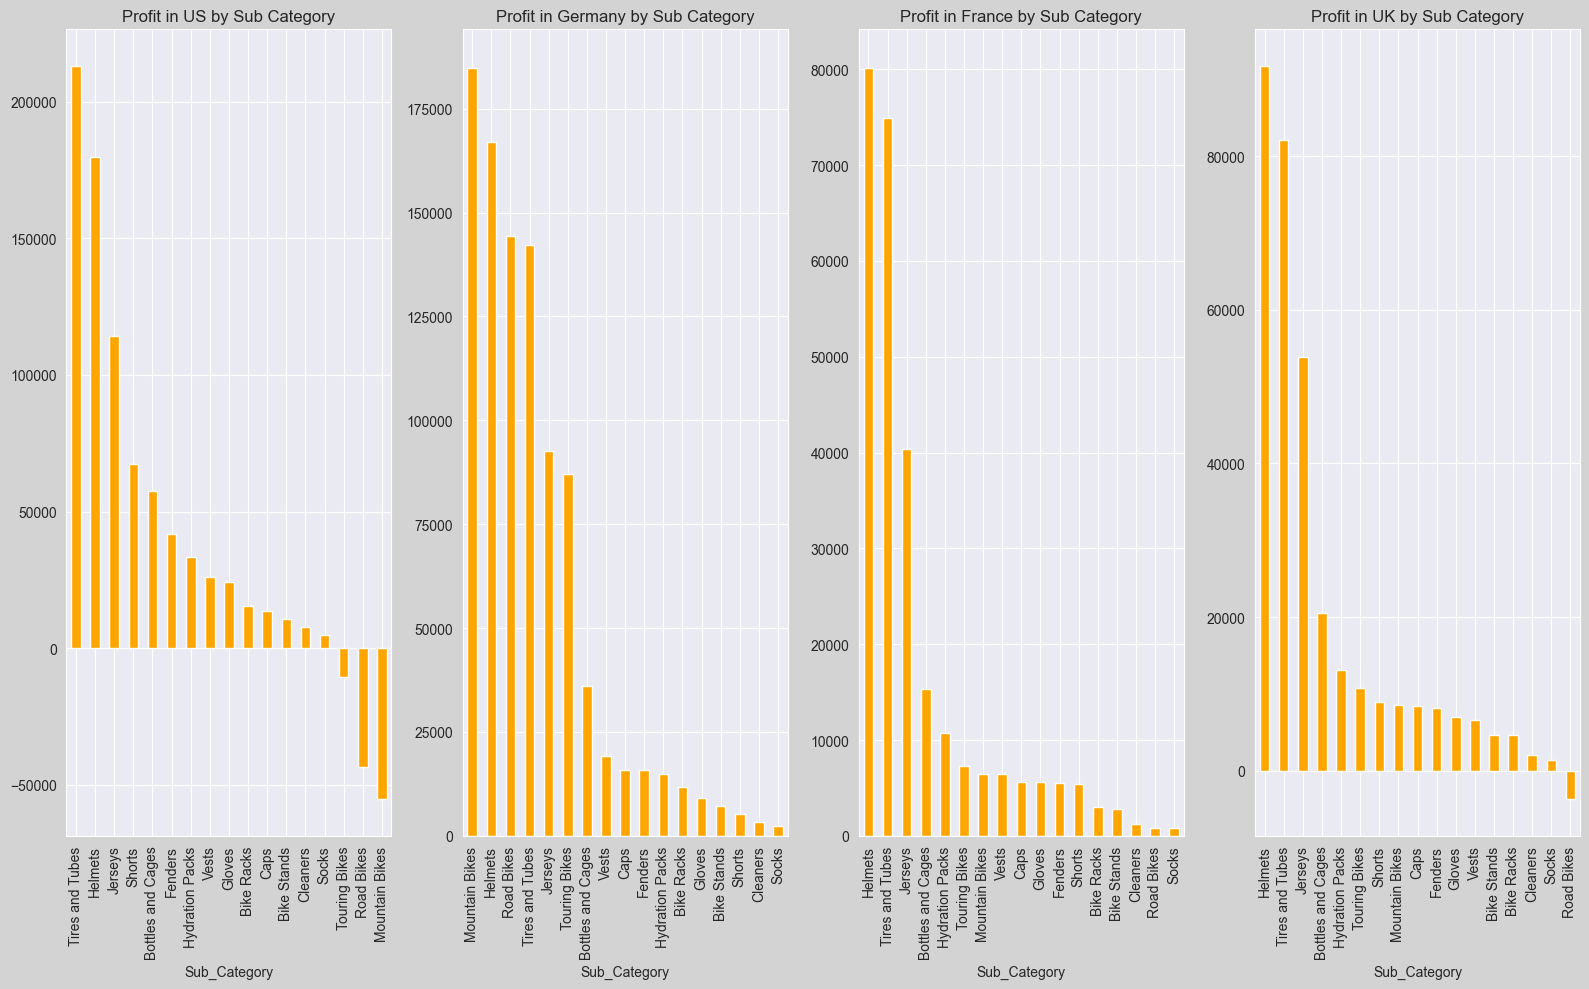

In [186]:
plt.figure(figsize = (16,10),facecolor='lightgrey')
plt.subplot(1, 4, 1, title="Profit in US by Sub Category")
bike_us.plot.bar(color='orange')
plt.subplot(1, 4, 2, title="Profit in Germany by Sub Category")
bike_ger.plot.bar(color='orange')
plt.subplot(1, 4, 3, title="Profit in France by Sub Category")
bike_fr.plot.bar(color='orange')
plt.subplot(1, 4, 4, title="Profit in UK by Sub Category")
bike_uk.plot.bar(color='orange')
plt.tight_layout()
plt.show()

-  **Tires & Tubes and Helmets are the top two subcatagories interms of Gross Profit in the US. Touring Bikes, Road Bikes and Moutain Bikes had a net loss in the US.**
-  **Mountain Bikes and Helmets contributed the highest gross profit in Germany respectively**
-  **Helmets and Tires& Tubes ere the top two in France and the United Kingdom. Road bikes were a net loss in the UK**

In [54]:
bike_us_rev_pc=bikes_s_u.groupby('Product_Category').Revenue.sum().sort_values(ascending=False)

bike_ger_rev_pc=bikes_s_g.groupby('Product_Category').Revenue.sum().sort_values(ascending=False)

bike_uk_rev_pc=bikes_s_uk.groupby('Product_Category').Revenue.sum().sort_values(ascending=False)

bike_fr_rev_pc=bikes_s_f.groupby('Product_Category').Revenue.sum().sort_values(ascending=False)

bike_us_cost_pc=bikes_s_u.groupby('Product_Category').Cost.sum().sort_values(ascending=False)

bike_ger_cost_pc=bikes_s_g.groupby('Product_Category').Cost.sum().sort_values(ascending=False)

bike_uk_cost_pc=bikes_s_uk.groupby('Product_Category').Cost.sum().sort_values(ascending=False)

bike_fr_cost_pc=bikes_s_f.groupby('Product_Category').Cost.sum().sort_values(ascending=False)


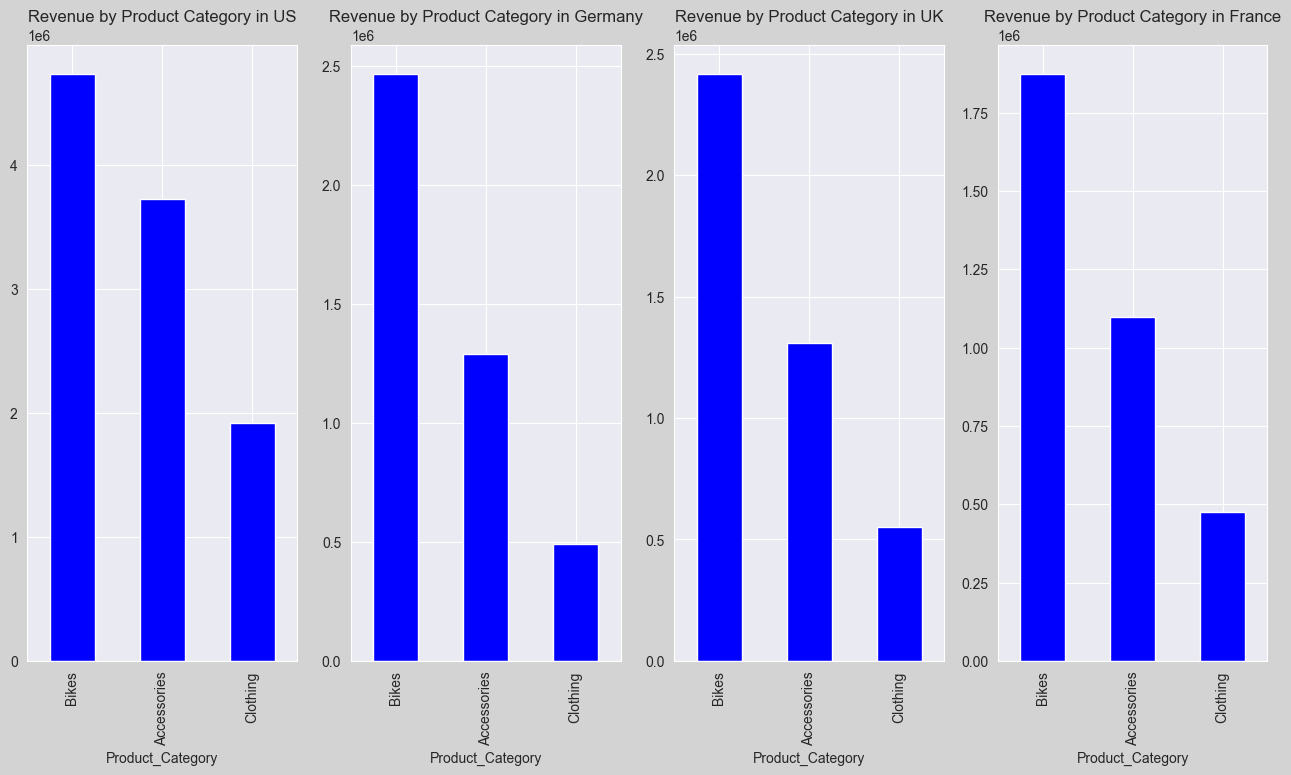

In [55]:
plt.figure(figsize = (16,8), facecolor='lightgrey')

plt.subplot(1,4,1, title='Revenue by Product Category in US')
bike_us_rev_pc.plot.bar(color='blue')

plt.subplot(1,4,2, title='Revenue by Product Category in Germany')
bike_ger_rev_pc.plot.bar(color='blue')

plt.subplot(1,4,3, title='Revenue by Product Category in UK')
bike_uk_rev_pc.plot.bar(color='blue')

plt.subplot(1,4,4, title='Revenue by Product Category in France')
bike_fr_rev_pc.plot.bar(color='blue')

plt.show()

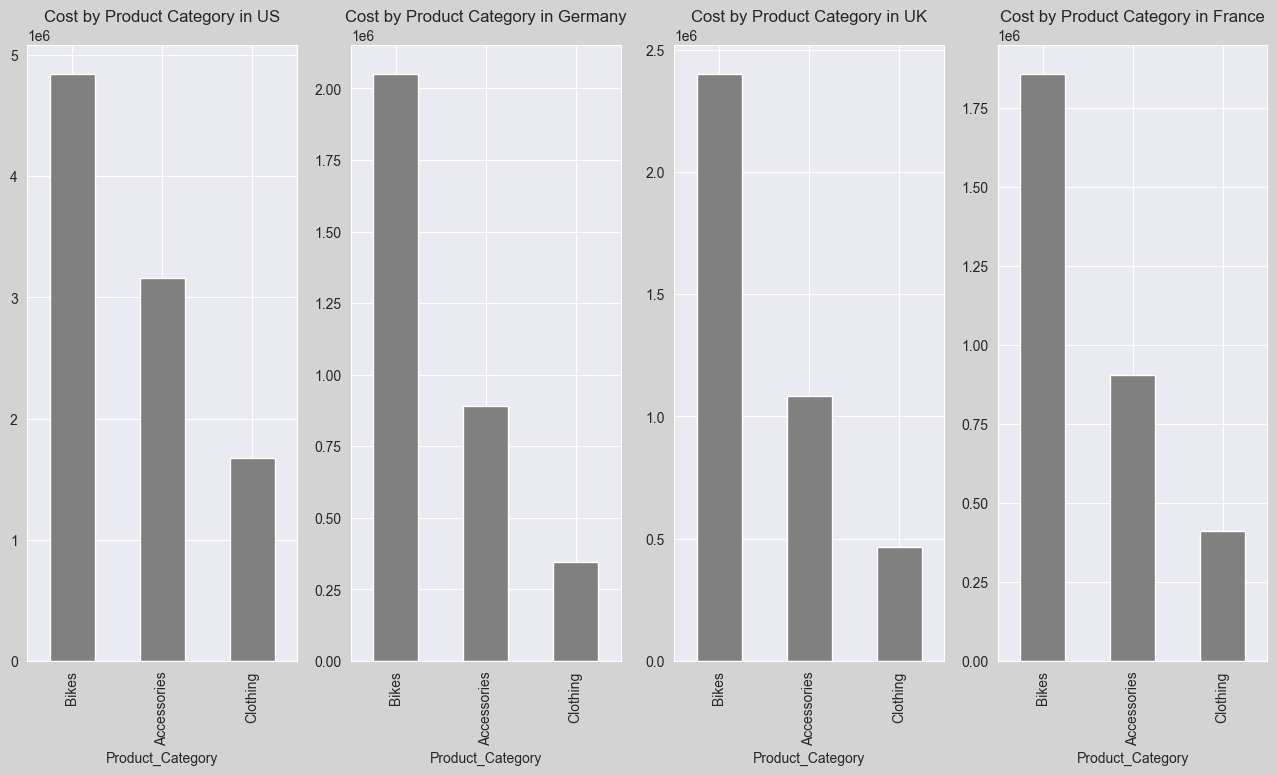

In [272]:
plt.figure(figsize = (16,8), facecolor='lightgrey')


plt.subplot(1,4,1, title='Cost by Product Category in US')
bike_us_cost_pc.plot.bar(color='grey')

plt.subplot(1,4,2, title='Cost by Product Category in Germany')
bike_ger_cost_pc.plot.bar(color='grey')

plt.subplot(1,4,3, title='Cost by Product Category in UK')
bike_uk_cost_pc.plot.bar(color='grey')

plt.subplot(1,4,4, title='Cost by Product Category in France')
bike_fr_cost_pc.plot.bar(color='grey')

plt.show()

-  **Bikes and Accessories accounted for the top two contributors in all four Countries. However both Revenue and Cost for both these product categories is significanly higher in the US; With bikes costing more than the revenue they bring in.**

##### Analysing Customer Age accross multiple variables

In [92]:
np.sort(bike_sales.Customer_Age.unique())

array([17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 84., 85., 86., 87.])

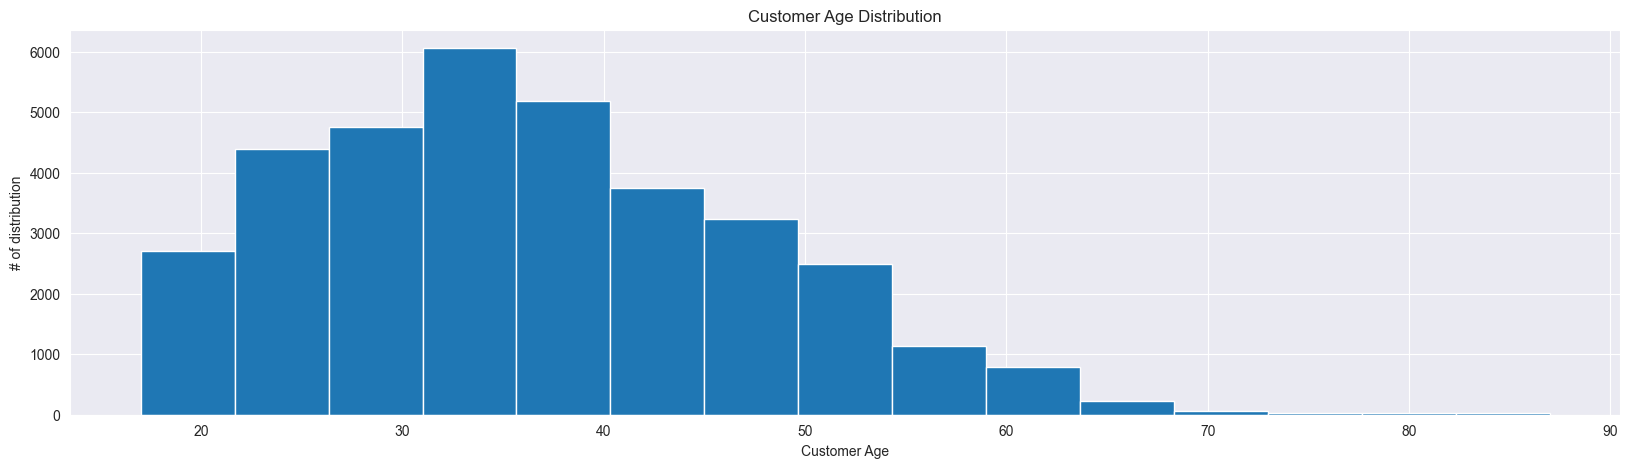

In [88]:
plt.hist(bike_sales['Customer_Age'], bins=15)
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('# of distribution')
plt.show()

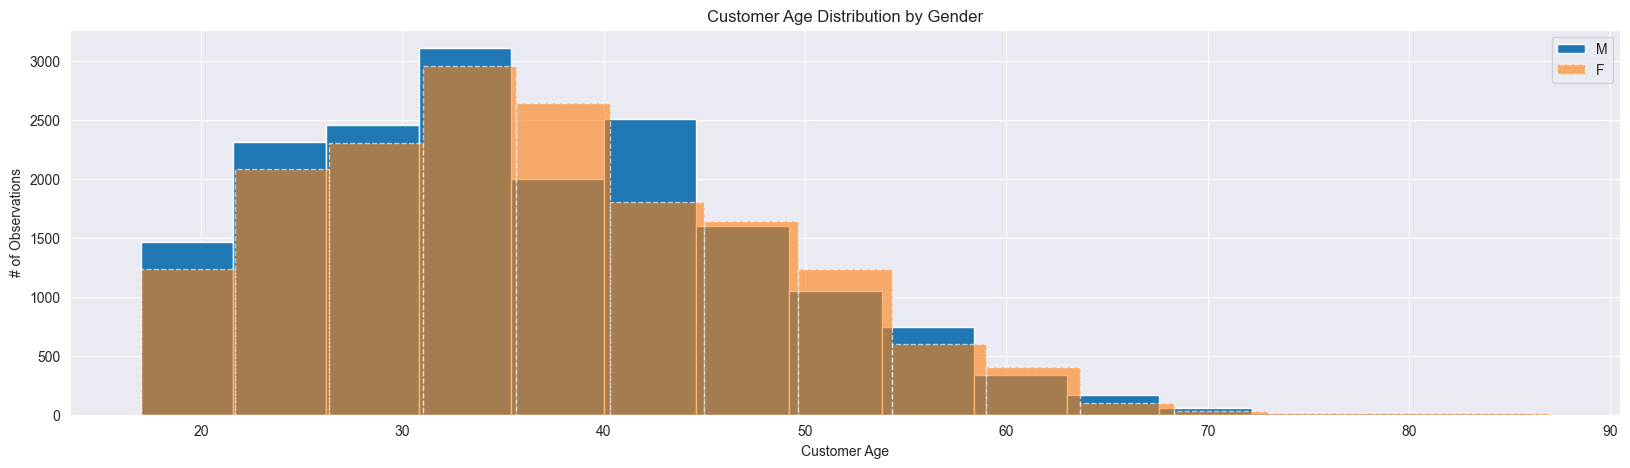

In [87]:
bike_M=bike_sales.loc[bike_sales.Customer_Gender=='M']
bike_F=bike_sales.loc[bike_sales.Customer_Gender=='F']
plt.hist(bike_M['Customer_Age'], bins=15)
plt.hist(bike_F['Customer_Age'], alpha=0.6, ls='dashed', bins=15)
plt.legend(['M', 'F'])
plt.title('Customer Age Distribution by Gender')
plt.xlabel('Customer Age')
plt.ylabel('# of Observations')
plt.show()

-  **It seems most customers fall between the ages of 25 and 45.**
-  **The distribution of customer age along customer gender is very similar although there are noticeably more Female customers between the ages of 35 and 40 and noticeably more  Male customers between the ages of 40 and 45**

In [72]:
avg_age_country=bike_sales.groupby(['Country']).Customer_Age.mean().sort_values(ascending=True)
avg_age_country

Country
Germany           34.864449
France            35.224265
United Kingdom    35.581997
United States     37.435550
Name: Customer_Age, dtype: float64

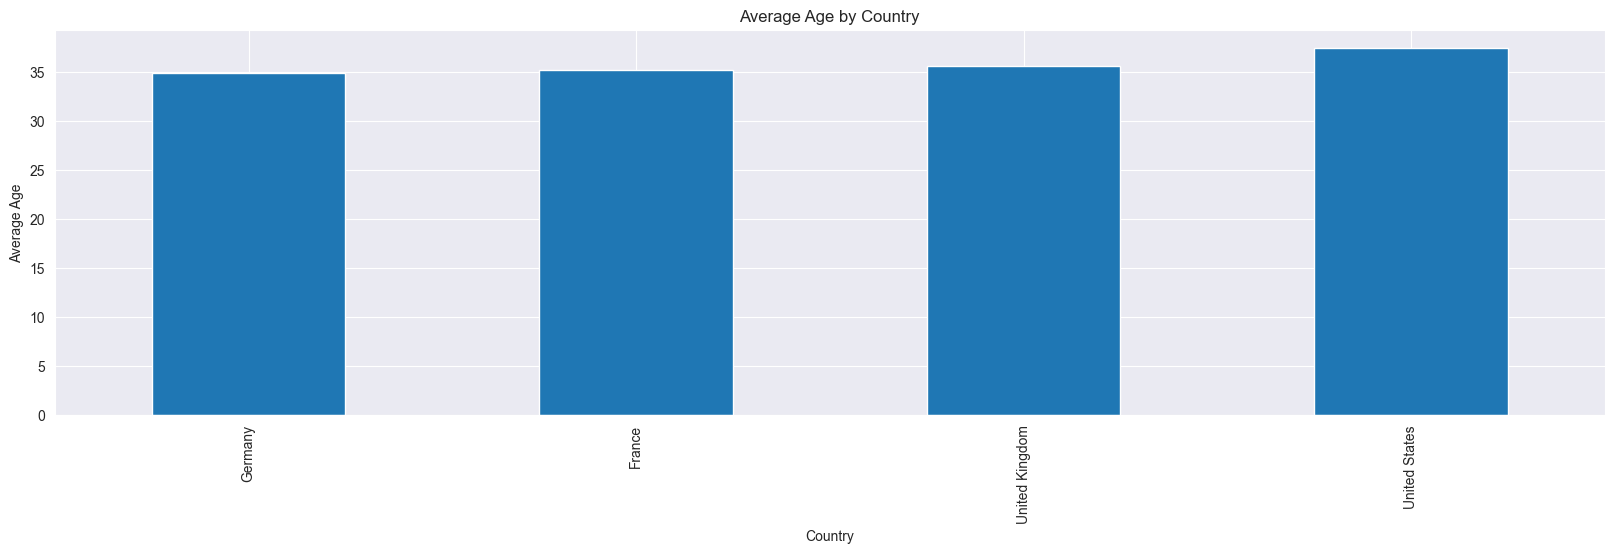

In [71]:

avg_age_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Age')
plt.title('Average Age by Country')
plt.show()

In [73]:
med_age_country=bike_sales.groupby(['Country']).Customer_Age.median().sort_values(ascending=True)
med_age_country

Country
France            33.0
Germany           33.0
United Kingdom    34.0
United States     37.0
Name: Customer_Age, dtype: float64

-  **The Average customer age in lowest in Germany at 34.8 years old with the US at 37.4 Years.**
-  **There isn't much difference between the median and average age in all 4 countries with Germany with a median of 33 years old and the US with a median of 37 years old**

##### Analyze consumption along age group (Creat an age-group column)

In [59]:
bike_sales.loc[bike_sales['Customer_Age']<20, 'age_group'] = '15-20'
bike_sales.loc[bike_sales['Customer_Age'].between(20,24), 'age_group'] = '20-24'
bike_sales.loc[bike_sales['Customer_Age'].between(25,29), 'age_group'] = '25-29'
bike_sales.loc[bike_sales['Customer_Age'].between(30,34), 'age_group'] = '30-34'
bike_sales.loc[bike_sales['Customer_Age'].between(35,39), 'age_group'] = '35-39'
bike_sales.loc[bike_sales['Customer_Age'].between(40,44), 'age_group'] = '40-44'
bike_sales.loc[bike_sales['Customer_Age'].between(45,49), 'age_group'] = '45-49'
bike_sales.loc[bike_sales['Customer_Age'].between(50,54), 'age_group'] = '50-54'
bike_sales.loc[bike_sales['Customer_Age'].between(55,59), 'age_group'] = '55-59'
bike_sales.loc[bike_sales['Customer_Age'].between(60,64), 'age_group'] = '60-64'
bike_sales.loc[bike_sales['Customer_Age'].between(65,69), 'age_group'] = '65-69'
bike_sales.loc[bike_sales['Customer_Age'].between(70,74), 'age_group'] = '70-74'
bike_sales.loc[bike_sales['Customer_Age'].between(75,79), 'age_group'] = '75-79'
bike_sales.loc[bike_sales['Customer_Age'].between(80,84), 'age_group'] = '80-84'
bike_sales.loc[bike_sales['Customer_Age'].between(85,89), 'age_group'] = '85-89'

In [55]:
bike_sales['age_group']

0        25-29
1        25-29
2        25-29
3        25-29
4        25-29
         ...  
34861    35-39
34862    35-39
34863    35-39
34864    35-39
34865    35-39
Name: age_group, Length: 34866, dtype: object

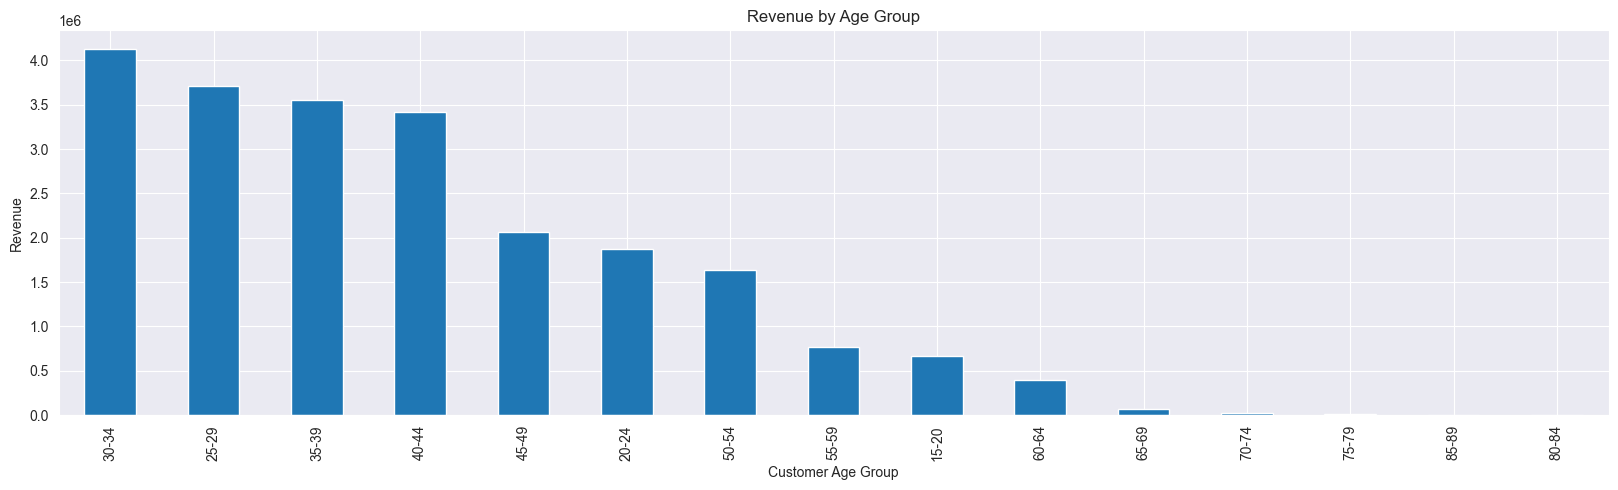

In [60]:
rev_by_age_grp=bike_sales.groupby(['age_group']).Revenue.sum().sort_values(ascending=False)
rev_by_age_grp.plot(kind='bar')
plt.xlabel('Customer Age Group')
plt.ylabel('Revenue')
plt.title('Revenue by Age Group')
plt.show()

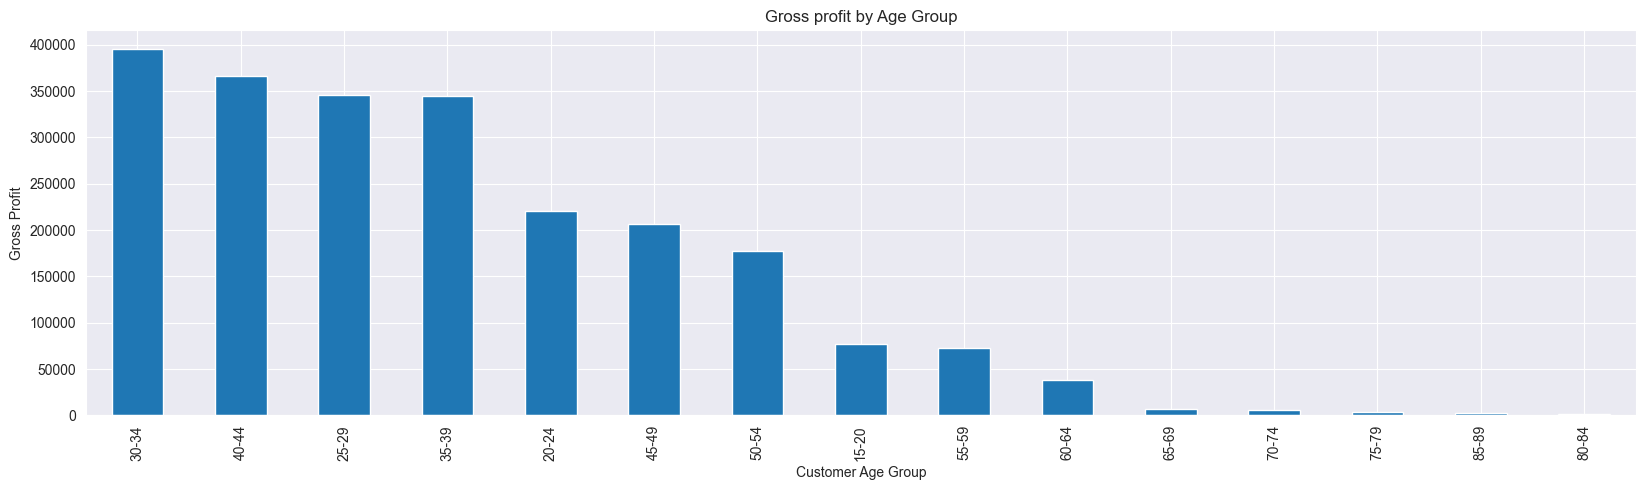

In [269]:
profit_by_age_grp=bike_sales.groupby(['age_group']).Gross_Profit.sum().sort_values(ascending=False)
profit_by_age_grp.plot(kind='bar')
plt.xlabel('Customer Age Group')
plt.ylabel('Gross Profit')
plt.title('Gross profit by Age Group')
plt.show()

-  **Although age groups 30-34 and  25-29 are the top two sources of revenue, it can be noted 40-44 age group is the 2nd highest source of Gross-Profit after 30-34 age group.**
-  **It is important to find out what product categories this age group is consuming**

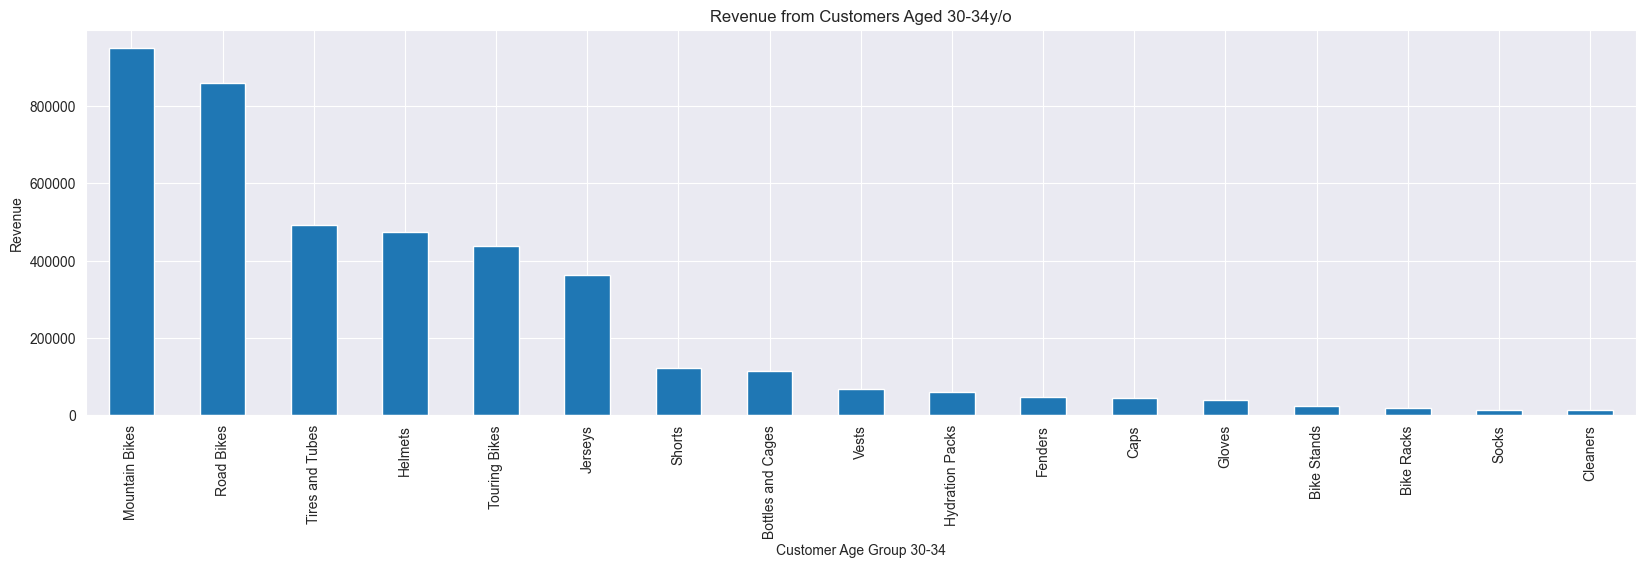

In [73]:
bike_3034=bike_sales.loc[bike_sales['age_group']=='30-34']
bike_sales_3044_r=bike_3034.groupby('Sub_Category').Revenue.sum().sort_values(ascending=False)
bike_sales_3044_r.plot(kind='bar')
plt.xlabel('Customer Age Group 30-34')
plt.ylabel('Revenue')
plt.title('Revenue from Customers Aged 30-34y/o')

plt.show()

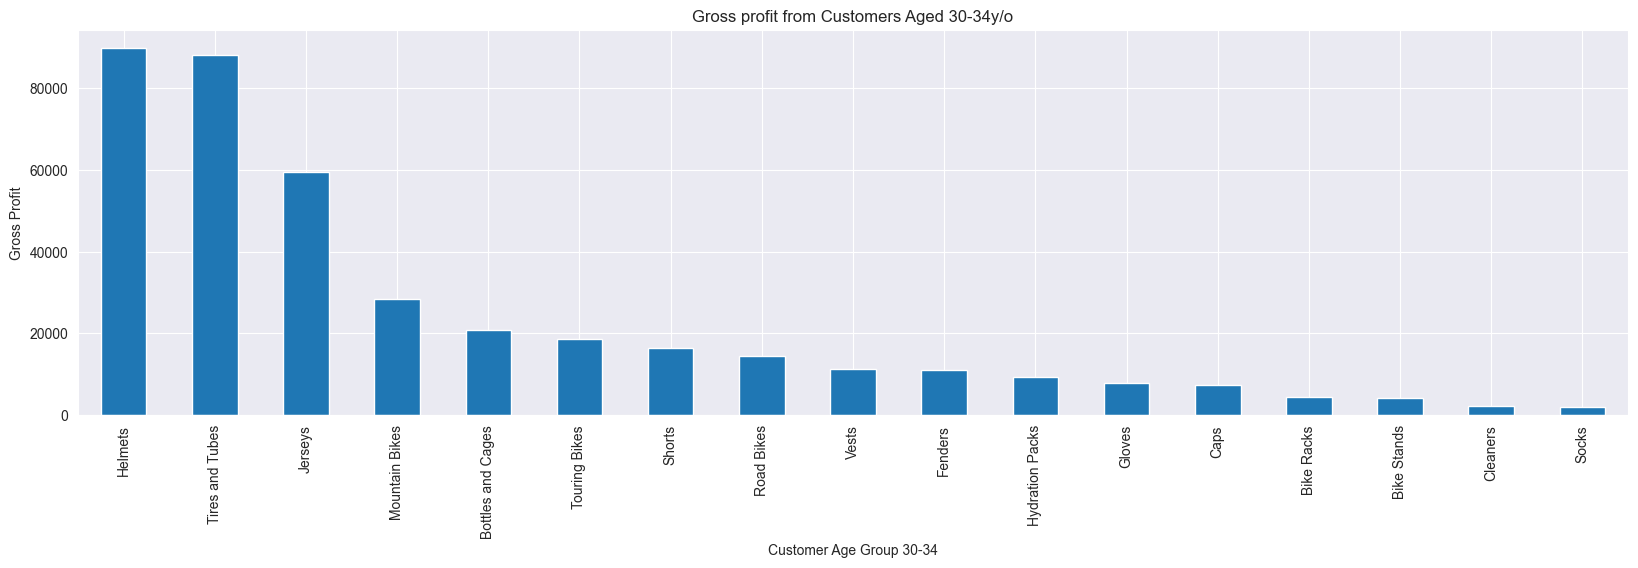

In [72]:
bike_3034=bike_sales.loc[bike_sales['age_group']=='30-34']
bike_sales_3044=bike_3034.groupby('Sub_Category').Gross_Profit.sum().sort_values(ascending=False)
bike_sales_3044.plot(kind='bar')
plt.xlabel('Customer Age Group 30-34')
plt.ylabel('Gross Profit')
plt.title('Gross profit from Customers Aged 30-34y/o')
plt.show()

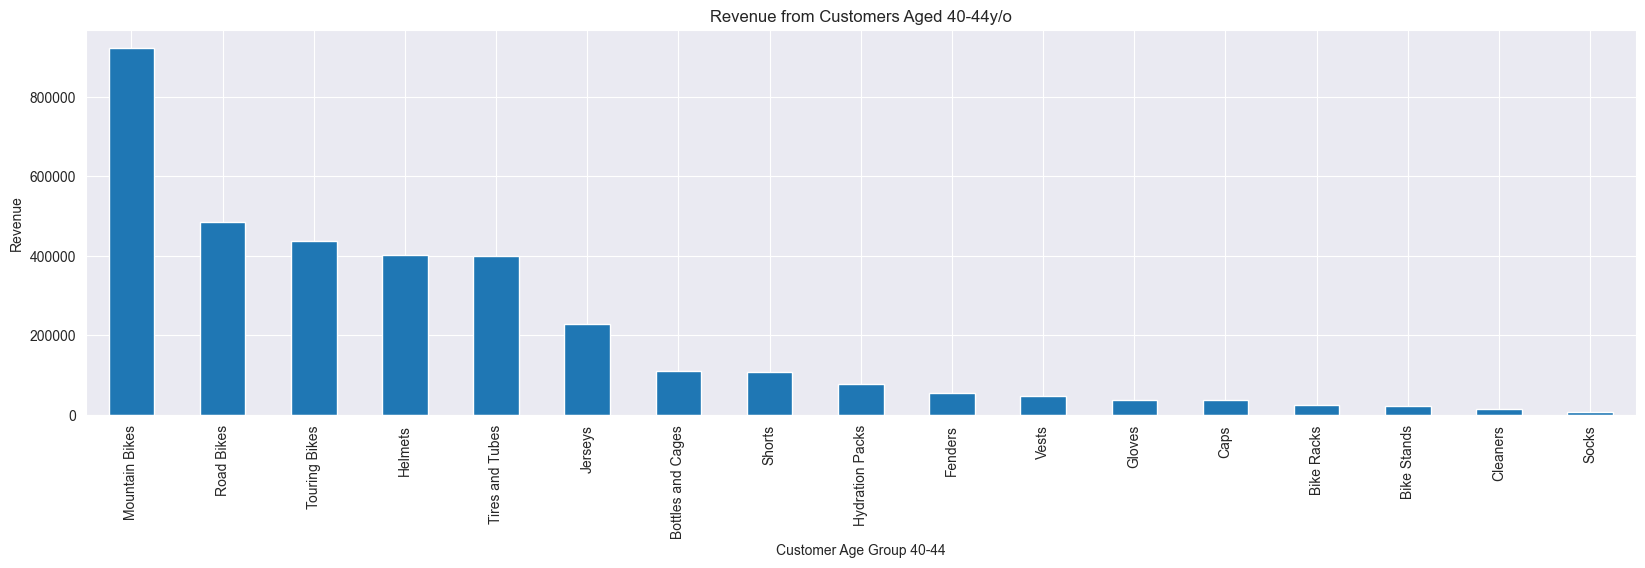

In [65]:
bike_4044=bike_sales.loc[bike_sales['age_group']=='40-44']
bike_sales_4044_r=bike_4044.groupby('Sub_Category').Revenue.sum().sort_values(ascending=False)
bike_sales_4044_r.plot(kind='bar')
plt.xlabel('Customer Age Group 40-44')
plt.ylabel('Revenue')
plt.title('Revenue from Customers Aged 40-44y/o')
plt.show()

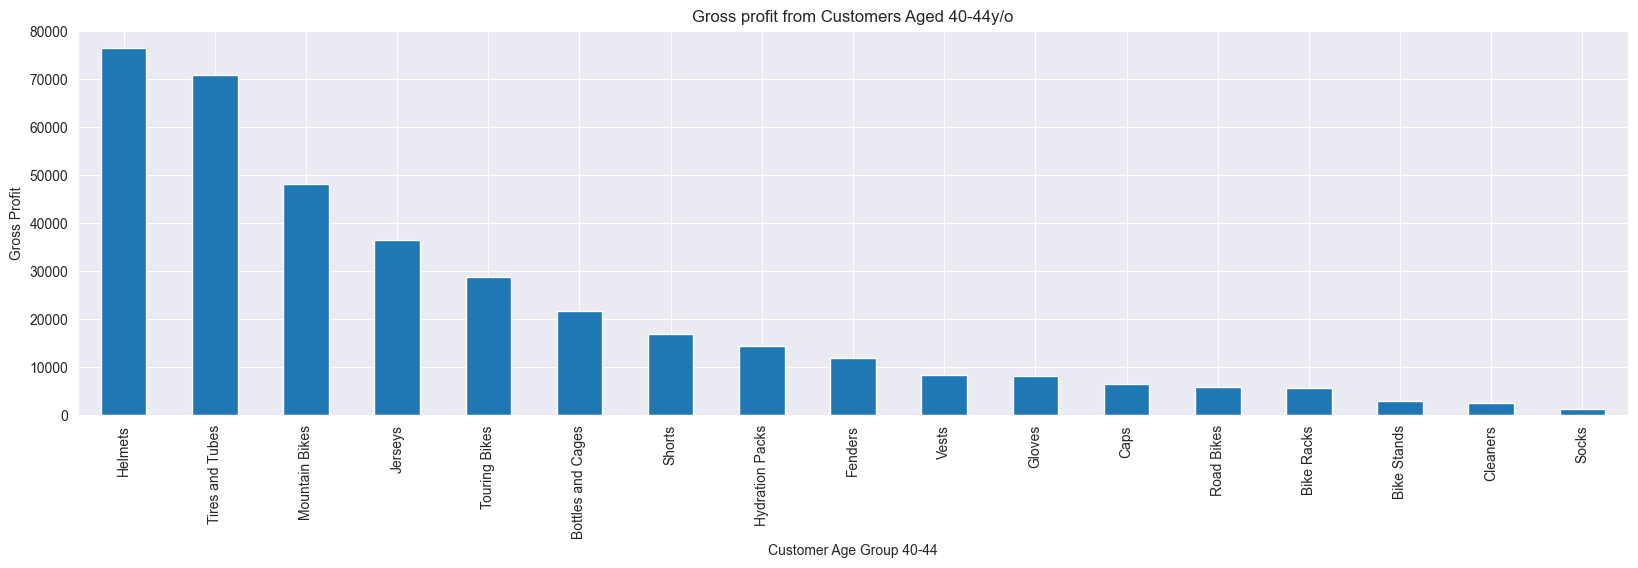

In [63]:
bike_4044=bike_sales.loc[bike_sales['age_group']=='40-44']
bike_sales_4044=bike_4044.groupby('Sub_Category').Gross_Profit.sum().sort_values(ascending=False)
bike_sales_4044.plot(kind='bar')
plt.xlabel('Customer Age Group 40-44')
plt.ylabel('Gross Profit')
plt.title('Gross profit from Customers Aged 40-44y/o')
plt.show()

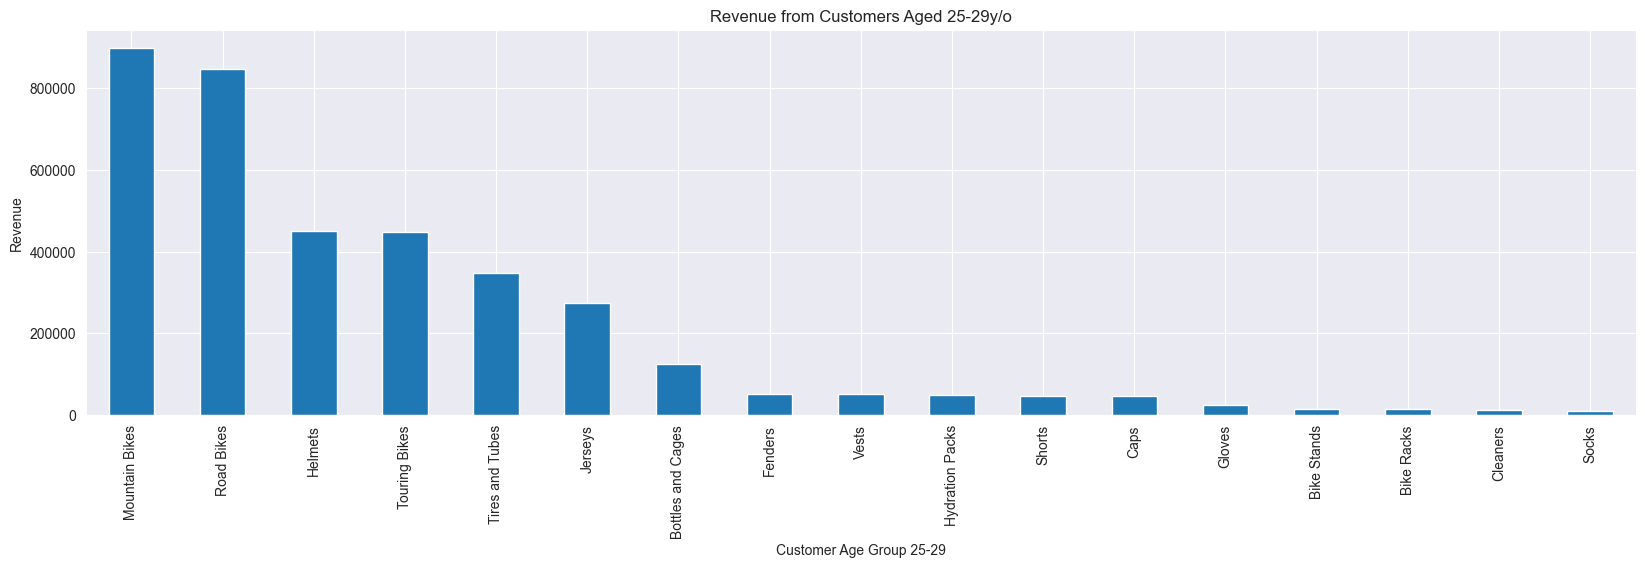

In [70]:
bike_2529=bike_sales.loc[bike_sales['age_group']=='25-29']
bike_sales_2529_r=bike_2529.groupby('Sub_Category').Revenue.sum().sort_values(ascending=False)
bike_sales_2529_r.plot(kind='bar')
plt.xlabel('Customer Age Group 25-29')
plt.ylabel('Revenue')
plt.title('Revenue from Customers Aged 25-29y/o')
plt.show()

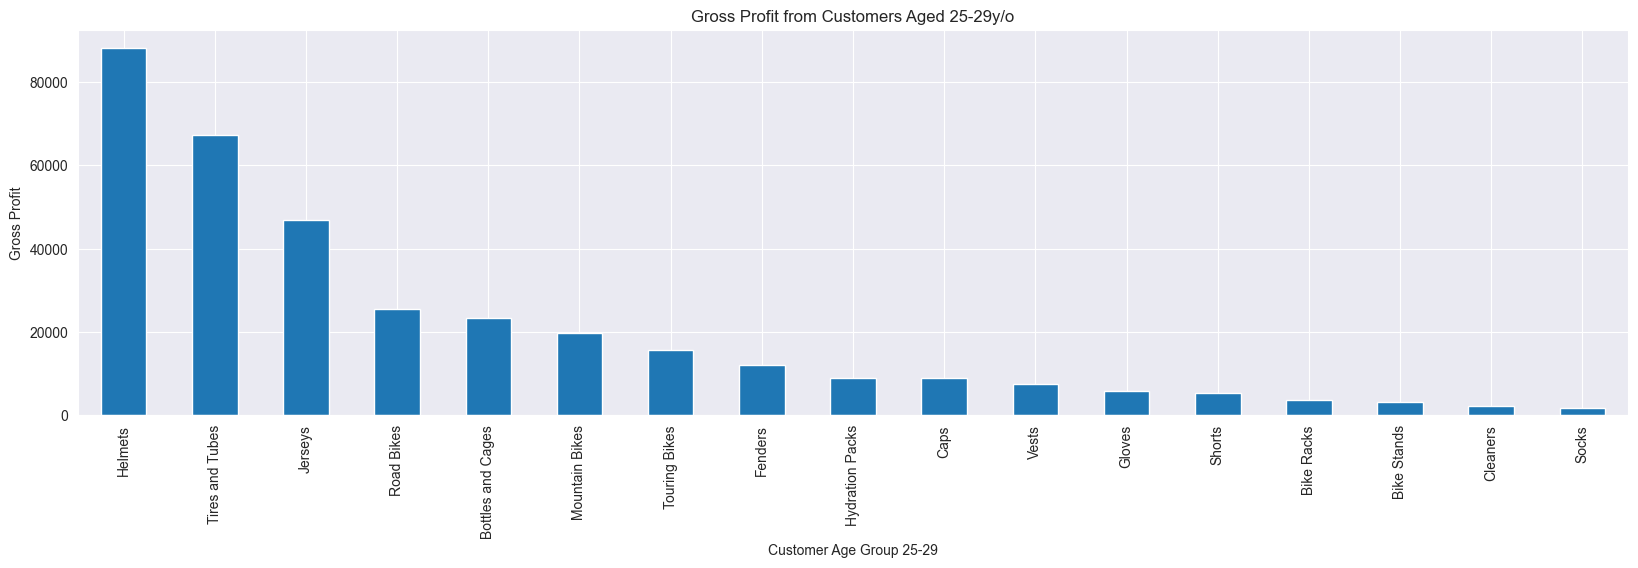

In [71]:
bike_2529=bike_sales.loc[bike_sales['age_group']=='25-29']
bike_sales_2529=bike_2529.groupby('Sub_Category').Gross_Profit.sum().sort_values(ascending=False)
bike_sales_2529.plot(kind='bar')
plt.xlabel('Customer Age Group 25-29')
plt.ylabel('Gross Profit')
plt.title('Gross Profit from Customers Aged 25-29y/o')
plt.show()

-  **The top 2 revenue producers in all three age groups (30-34, 25-29 and 40-44) are Mountain Bike and Road Bike.**
-  **The reason 40-44 age group beats 24-29 age group in gross profit is because they spend on more accessories (Tires & Tubes) which have large profit margins**

##### Consumption alon customer gender

In [62]:
(bike_sales.groupby(['Customer_Gender']).Revenue.sum())/(bike_sales.Revenue.sum())*100


Customer_Gender
F    48.926058
M    51.071071
Name: Revenue, dtype: float64

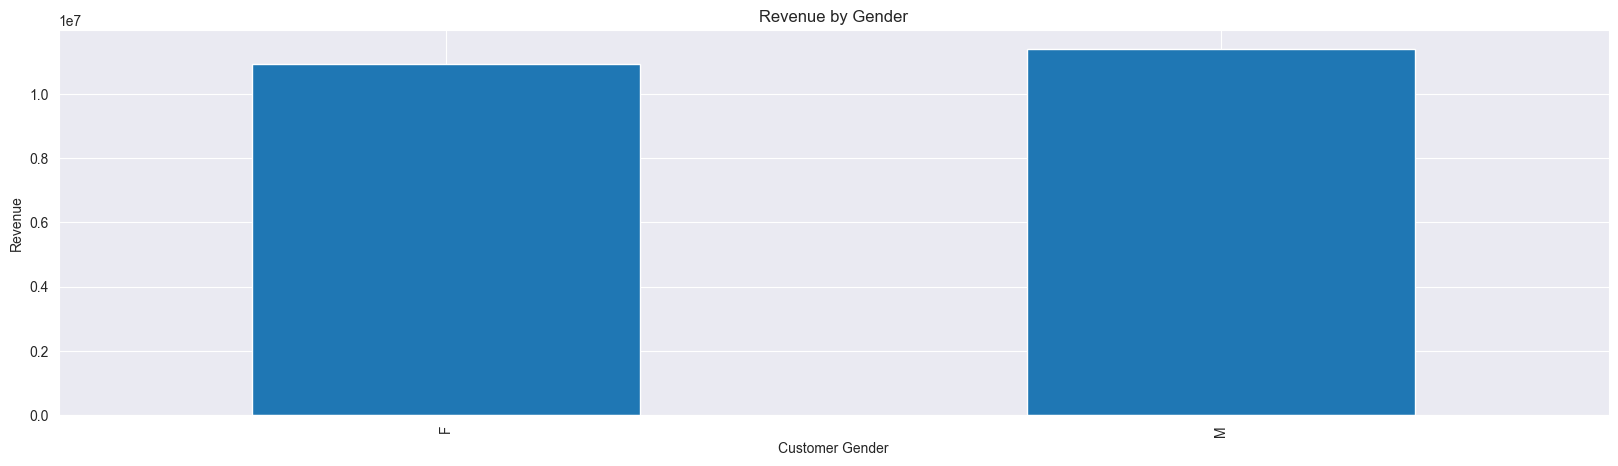

In [266]:
by_gen=(bike_sales.groupby(['Customer_Gender']).Revenue.sum())
by_gen.plot(kind='bar')
plt.xlabel('Customer Gender')
plt.ylabel('Revenue')
plt.title('Revenue by Gender')
plt.show()

-  **There is no significant difference in spending between genders w/ Female consumers accounting for 49% of revenue and Male customers accounting 51%**

#### Time-Series Analysis

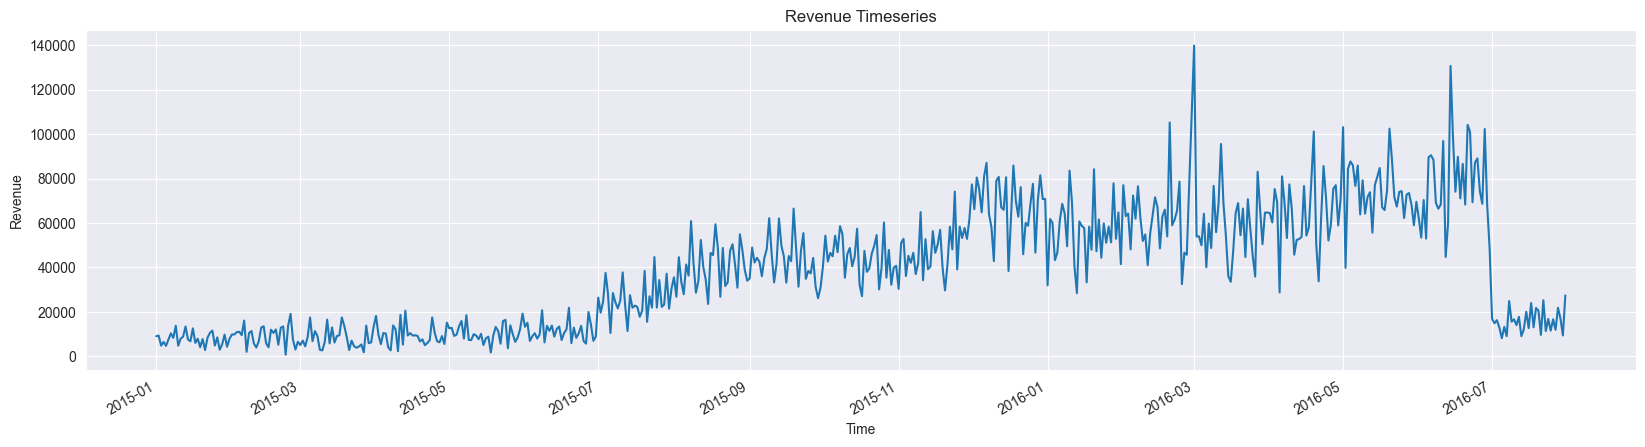

In [265]:
sales_by_date=bike_sales.groupby(['Date']).Revenue.sum().sort_values(ascending=False)
sales_by_date.plot(kind='line')
plt.ylabel('Revenue')
plt.xlabel('Time')
plt.title('Revenue Timeseries')
plt.show()

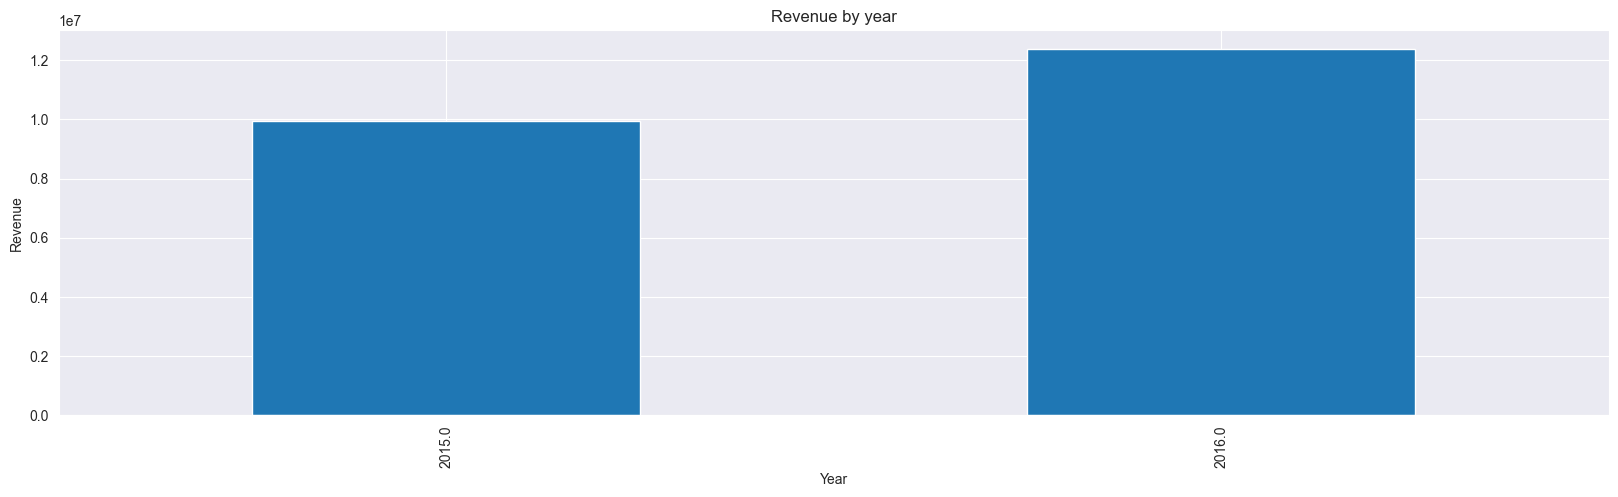

In [78]:
sales_by_yr=bike_sales.groupby(['Year']).Revenue.sum().sort_values(ascending=True)
sales_by_yr.plot(kind='bar')
plt.ylabel('Revenue')
plt.xlabel('Year')
plt.title('Revenue by year')
plt.show()

In [82]:
sales_by_yr

Year
2015.0     9947771.0
2016.0    12396805.0
Name: Revenue, dtype: float64

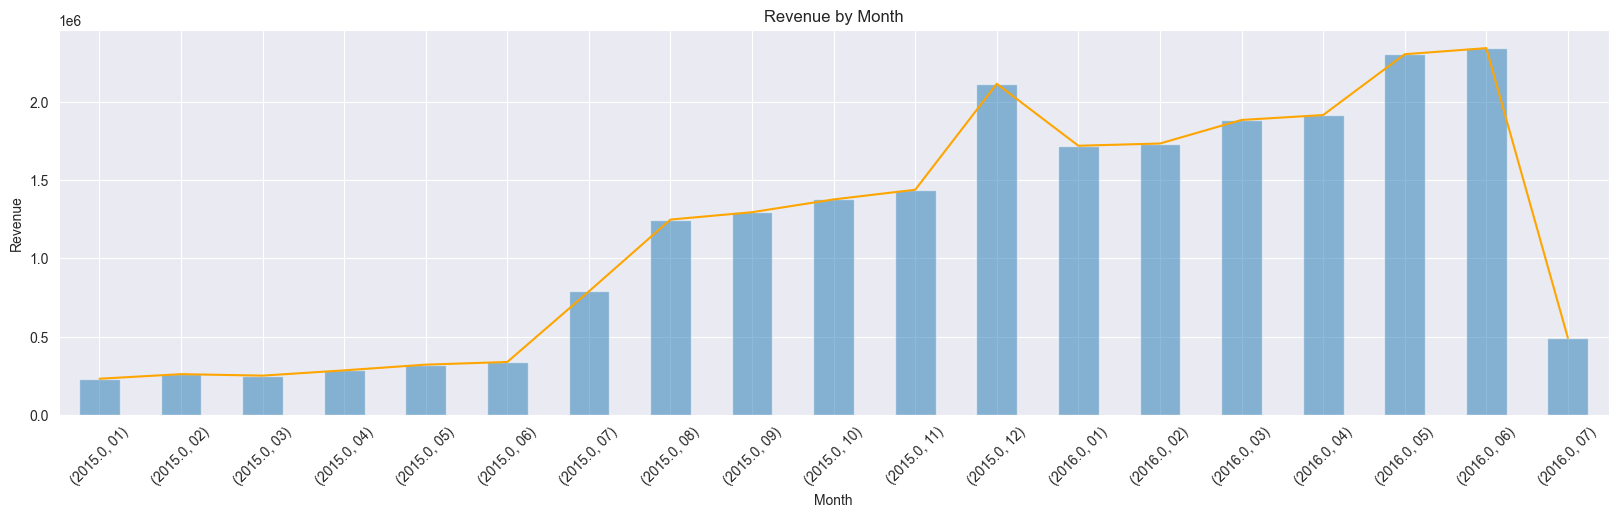

In [58]:
sales_by_ym=bike_sales.groupby(['Year','#_Month']).Revenue.sum()
sales_by_ym.plot(kind='bar', alpha=0.5, rot=45)
sales_by_ym.plot(kind='line', color='orange', rot=45)
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.title('Revenue by Month')
plt.show()

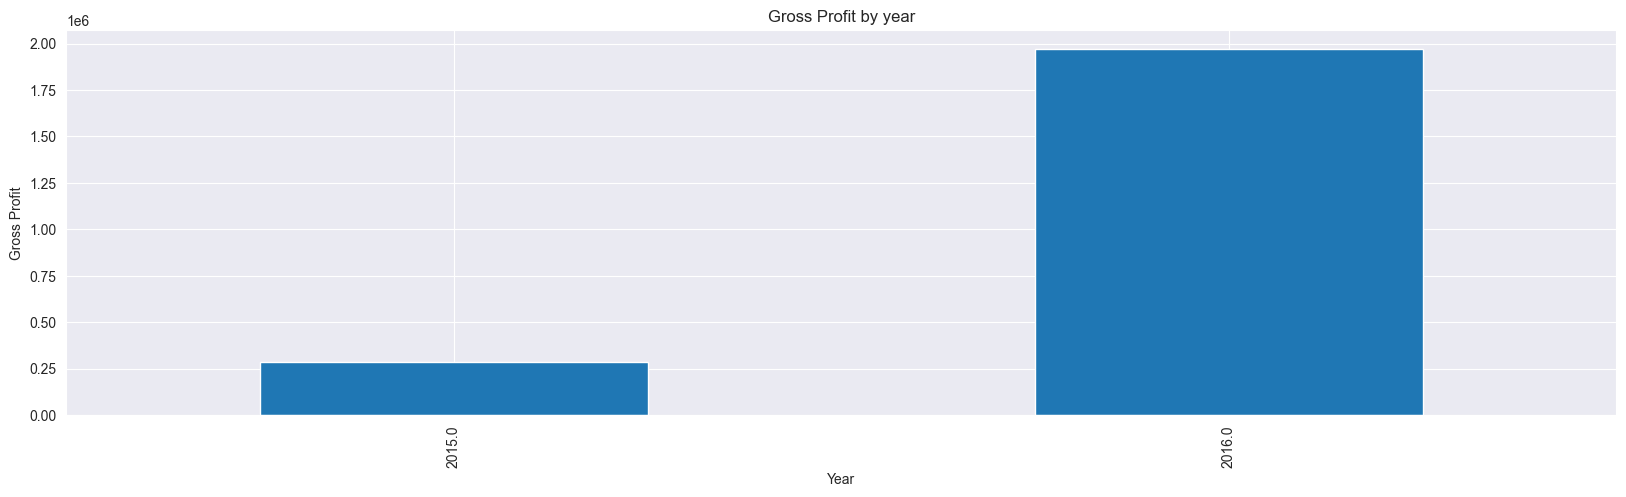

In [84]:
profit_by_yr=bike_sales.groupby(['Year']).Gross_Profit.sum().sort_values(ascending=True)
profit_by_yr.plot(kind='bar')
plt.ylabel('Gross Profit')
plt.xlabel('Year')
plt.title('Gross Profit by year')
plt.show()

In [85]:
profit_by_yr

Year
2015.0     288620.0
2016.0    1972982.0
Name: Gross_Profit, dtype: float64

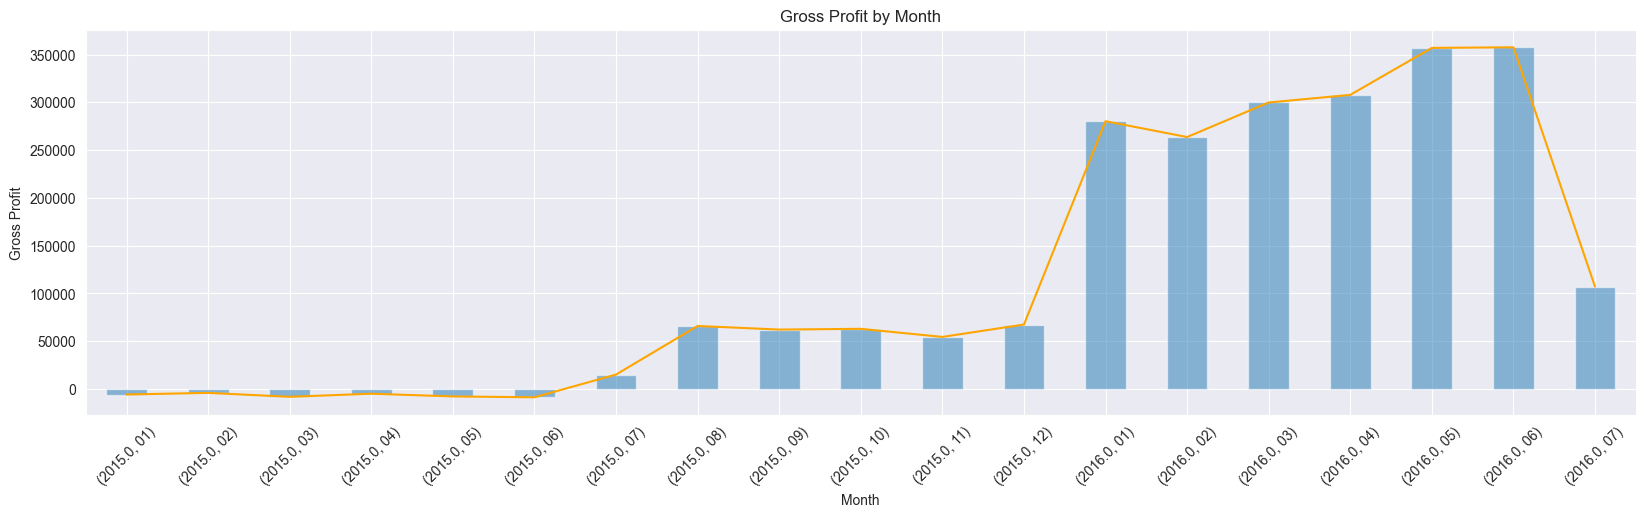

In [242]:
profit_by_ym=bike_sales.groupby(['Year','#_Month']).Gross_Profit.sum()
profit_by_ym.plot(kind='bar', alpha=0.5, rot=45)
profit_by_ym.plot(kind='line', color='orange', rot=45)
plt.ylabel('Gross Profit')
plt.xlabel('Month')
plt.title('Gross Profit by Month')
plt.show()

-  **There is a noticeable increase in Revenue in 2016 compared to 2015. Going from 10M to 12.5M**
-  **There is also a significant increase in Gross Profit from 2015(290M) to 2016(2M)** 
-  **Looking at Revenue and gross profit on a month to month basis periods between 06/2015 and 08/2015, 11/2016-12/2016 show a large increase in revenue that needs to be explored**
-  **the drop off in revenue/gross profit in the Period between 06/2016 and 07/2016 is explained by data that has not been collected yet**

##### Comparing each product category contribution towards gross profit

In [258]:
gross_profit_tot=bike_sales.groupby('Year_Month').Gross_Profit.sum()
bikes_profit=bike_sales[bike_sales['Product_Category']=='Bikes'].groupby('Year_Month').Gross_Profit.sum()
accessories_profit=bike_sales[bike_sales['Product_Category']=='Accessories'].groupby('Year_Month').Gross_Profit.sum()
clothing_profit=bike_sales[bike_sales['Product_Category']=='Clothing'].groupby('Year_Month').Gross_Profit.sum()

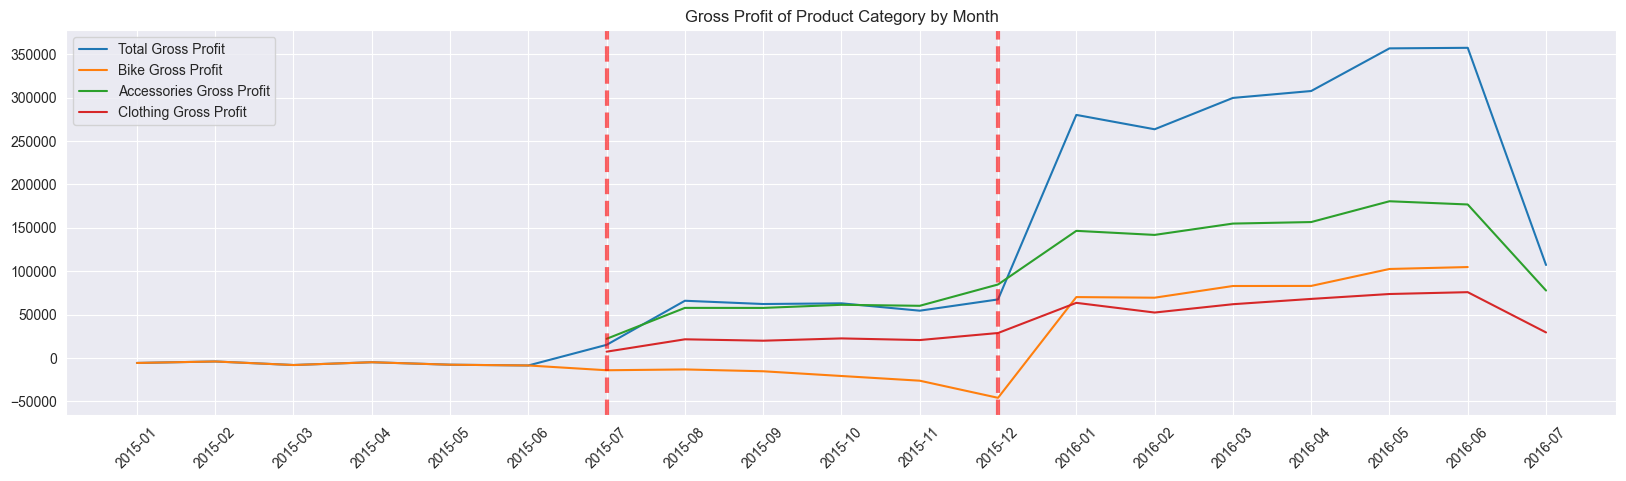

In [281]:
plt.figure()
plt.plot(gross_profit_tot,label='Total Gross Profit')
plt.plot(bikes_profit,label='Bike Gross Profit')
plt.plot(accessories_profit,label='Accessories Gross Profit')
plt.plot(clothing_profit,label='Clothing Gross Profit')
plt.legend(loc=2)
plt.title('Gross Profit of Product Category by Month')
plt.xticks(rotation=45)
plt.axvline(x='2015-07',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2015-12',color='red',lw=3,ls='--',alpha=0.6)
plt.show()

-  **Accessories have the largest contribution towards gross profit**
-  **company started selling Accessories and clothing in 07/2015 which has contributed to profit growth.**
-  **There is a sharp increase in gross-profit after 12/2015 in all three categories and has stayed up, it's important to find the changes the company made to increase profit.**

### Drilling down on Unit pricing, cost and margin

##### Average Unit Price by product category

In [56]:
bikes_uprice_avg=bike_sales[bike_sales['Product_Category']=='Bikes'].groupby('Year_Month').Unit_Price.mean()
accessories_uprice_avg=bike_sales[bike_sales['Product_Category']=='Accessories'].groupby('Year_Month').Unit_Price.mean()
clothing_uprice_avg=bike_sales[bike_sales['Product_Category']=='Clothing'].groupby('Year_Month').Unit_Price.mean()

bikes_ucost_avg=bike_sales[bike_sales['Product_Category']=='Bikes'].groupby('Year_Month').Unit_Cost.mean()
accessories_ucost_avg=bike_sales[bike_sales['Product_Category']=='Accessories'].groupby('Year_Month').Unit_Cost.mean()
clothing_ucost_avg=bike_sales[bike_sales['Product_Category']=='Clothing'].groupby('Year_Month').Unit_Cost.mean()


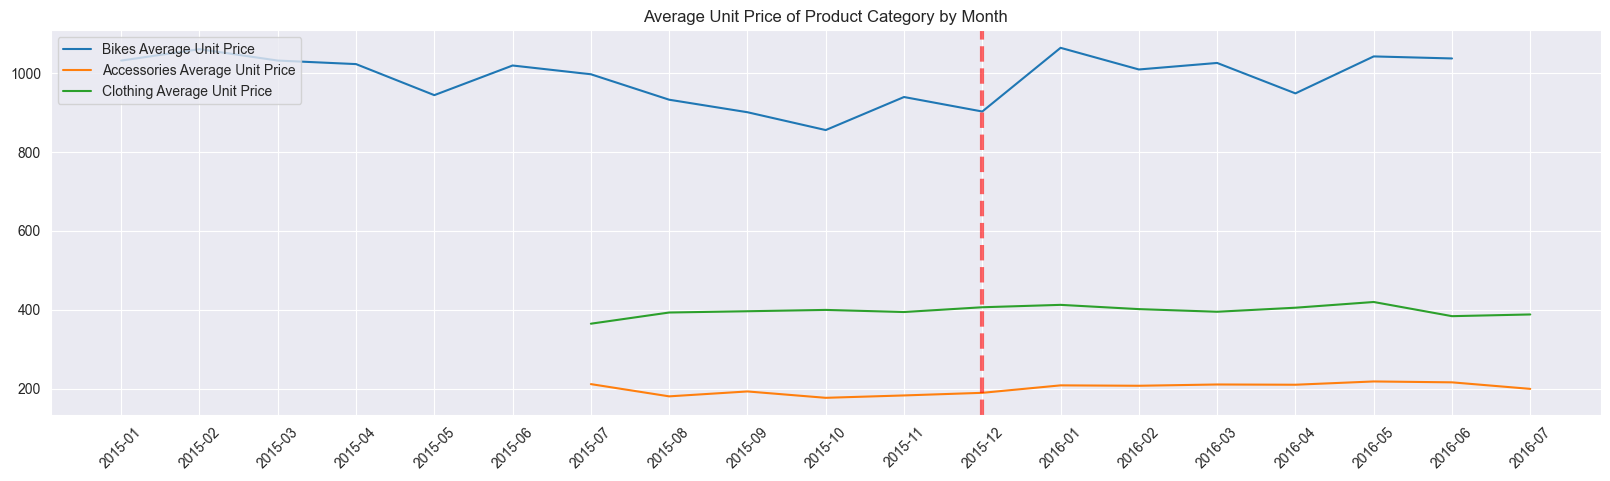

In [295]:
plt.figure()
plt.plot(bikes_uprice_avg,label='Bikes Average Unit Price')
plt.plot(accessories_uprice_avg,label='Accessories Average Unit Price')
plt.plot(clothing_uprice_avg,label='Clothing Average Unit Price')
plt.legend(loc=2)
plt.title('Average Unit Price of Product Category by Month')
plt.xticks(rotation=45)
plt.axvline(x='2015-12',color='red',lw=3,ls='--',alpha=0.6)
plt.show()

-  **There is an increase in average unit price in the Bike category in 12/2015. This could be the reason why revenue started increasing at this time.**
-  **It is important to analyze average unit cost to determine if this increase in unit price is also responsible for the increase in profit**

##### Average Unit cost by product category

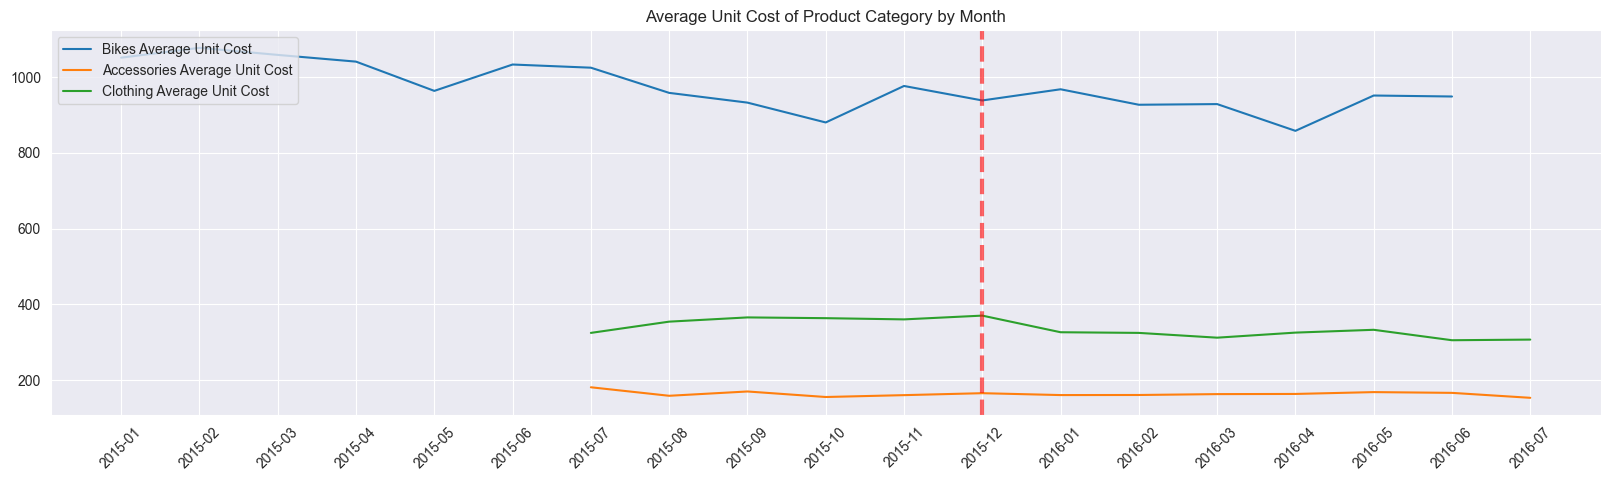

In [296]:
plt.figure()
plt.plot(bikes_ucost_avg,label='Bikes Average Unit Cost')
plt.plot(accessories_ucost_avg,label='Accessories Average Unit Cost')
plt.plot(clothing_ucost_avg,label='Clothing Average Unit Cost')
plt.legend(loc=2)
plt.title('Average Unit Cost of Product Category by Month')
plt.xticks(rotation=45)
plt.axvline(x='2015-12',color='red',lw=3,ls='--',alpha=0.6)
plt.show()

-  **There is no significant change in the average bike unit cost in 12/2015. This explains the increas in Profit during the same time**
-  **There is also a slight decrease in unit cost in 12/2015 in clothing category while it was noted that there was no significant change in Unit price earlier. This also contributed to the boost in profit at the same time.**

##### Average Unit-Profit(Unit-Margin) by product category

In [105]:
bike_sales['Unit_Profit']=bike_sales.Unit_Price-bike_sales.Unit_Cost

In [106]:
bikes_uprofit_avg=bike_sales[bike_sales['Product_Category']=='Bikes'].groupby('Year_Month').Unit_Profit.mean()
accessories_uprofit_avg=bike_sales[bike_sales['Product_Category']=='Accessories'].groupby('Year_Month').Unit_Profit.mean()
clothing_uprofit_avg=bike_sales[bike_sales['Product_Category']=='Clothing'].groupby('Year_Month').Unit_Profit.mean()

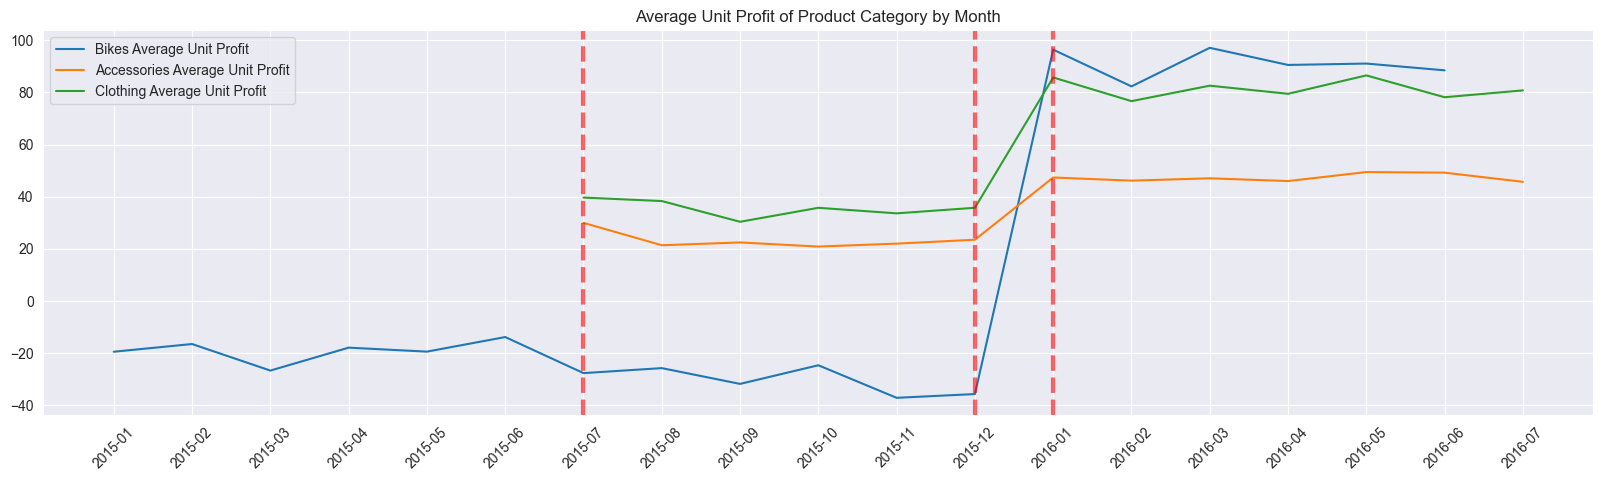

In [107]:
plt.figure()
plt.plot(bikes_uprofit_avg,label='Bikes Average Unit Profit')
plt.plot(accessories_uprofit_avg,label='Accessories Average Unit Profit')
plt.plot(clothing_uprofit_avg,label='Clothing Average Unit Profit')
plt.legend(loc=2)
plt.title('Average Unit Profit of Product Category by Month')
plt.xticks(rotation=45)
plt.axvline(x='2015-12',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2016-01',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2015-07',color='red',lw=3,ls='--',alpha=0.6)
plt.show()

-  **As expected Bike sales and clothing unit profit have the biggest jump in 12/2015 with accessories having a minor jump**
-  **Although accessories has a lower unit margin than clothing and bikes, it has the largest gross total profit as seen earlier. Accessories has high total gross profit because it sells more volume**

##### Average Unit-profit on the 3 Bike Sub-categories

In [37]:
mt_bike_avg=bike_sales[bike_sales['Sub_Category']=='Mountain Bikes'].groupby('Year_Month').Unit_Profit.mean()
rd_bike_avg=bike_sales[bike_sales['Sub_Category']=='Road Bikes'].groupby('Year_Month').Unit_Profit.mean()
tr_bike_avg=bike_sales[bike_sales['Sub_Category']=='Touring Bikes'].groupby('Year_Month').Unit_Profit.mean()

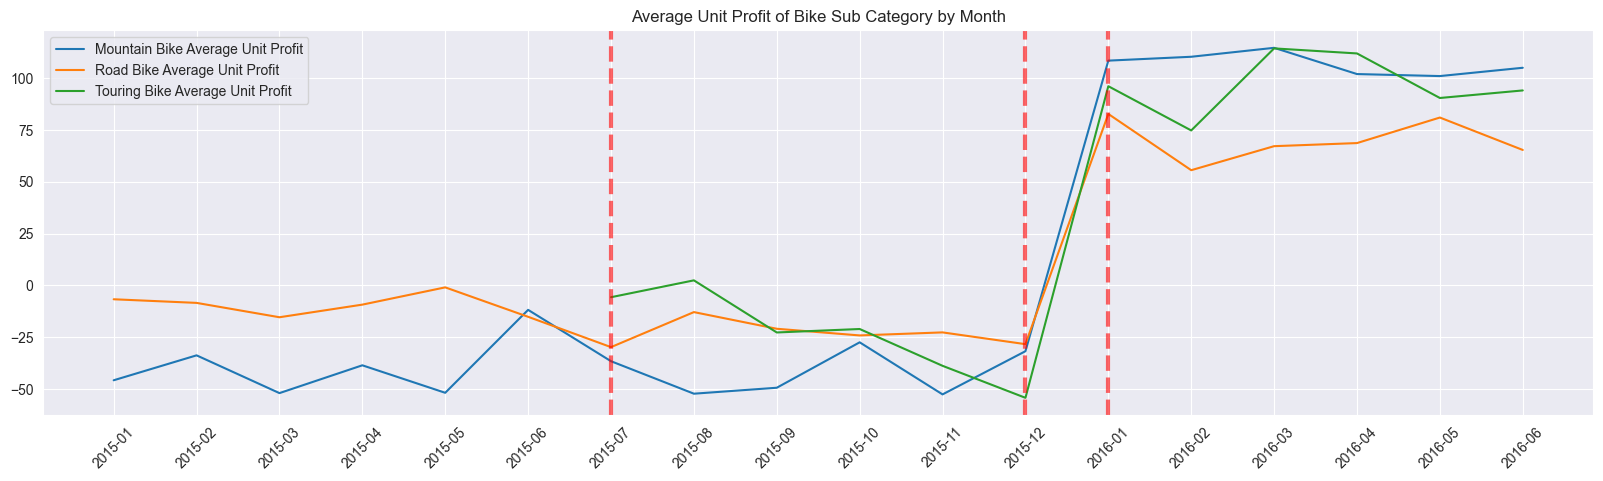

In [38]:
plt.figure()
plt.plot(mt_bike_avg,label='Mountain Bike Average Unit Profit')
plt.plot(rd_bike_avg,label='Road Bike Average Unit Profit')
plt.plot(tr_bike_avg,label='Touring Bike Average Unit Profit')
plt.legend(loc=2)
plt.title('Average Unit Profit of Bike Sub Category by Month')
plt.xticks(rotation=45)
plt.axvline(x='2015-12',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2016-01',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2015-07',color='red',lw=3,ls='--',alpha=0.6)
plt.show()

-  **Touring bikes were incroduced to the market in 07/2015**
-  **All 3 bike subcategories were producing a net loss until after 12/2016. After that Mountain bikes and Touring bikes had the top 2 unit  margin followed closely by Road bikes.**

##### Average Unit Cost of the 3 bike sub-categories

In [86]:
mt_bike_avg_c=bike_sales[bike_sales['Sub_Category']=='Mountain Bikes'].groupby('Year_Month').Unit_Cost.mean()
rd_bike_avg_c=bike_sales[bike_sales['Sub_Category']=='Road Bikes'].groupby('Year_Month').Unit_Cost.mean()
tr_bike_avg_c=bike_sales[bike_sales['Sub_Category']=='Touring Bikes'].groupby('Year_Month').Unit_Cost.mean()

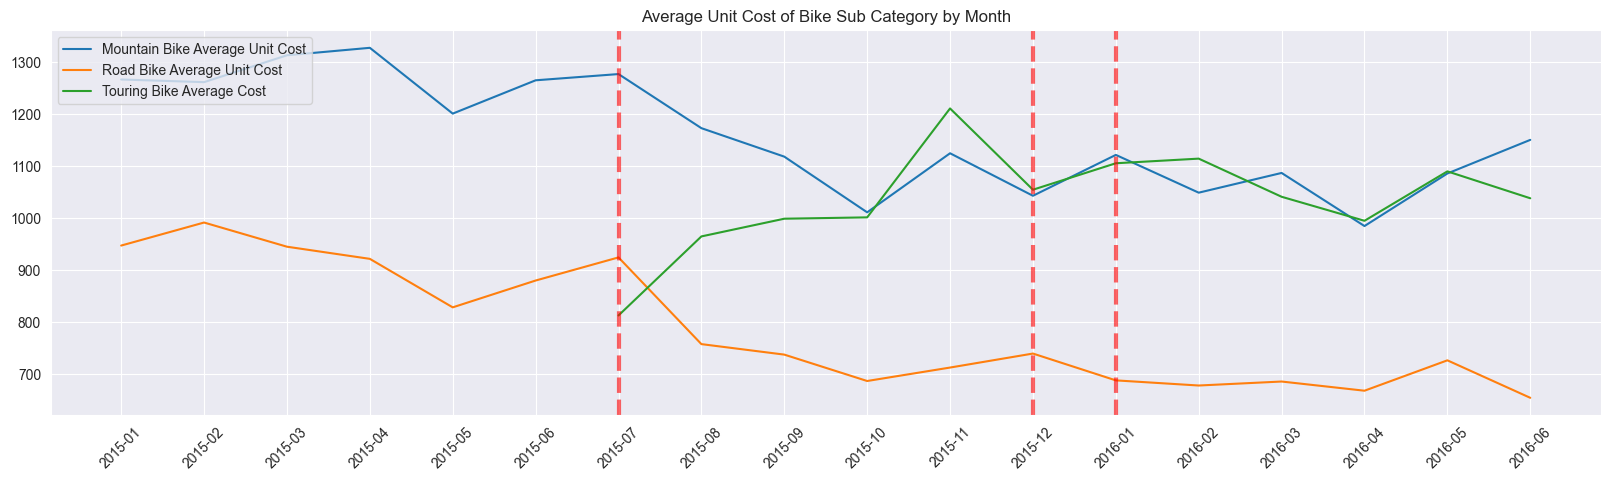

In [87]:
plt.figure()
plt.plot(mt_bike_avg_c,label='Mountain Bike Average Unit Cost')
plt.plot(rd_bike_avg_c,label='Road Bike Average Unit Cost')
plt.plot(tr_bike_avg_c,label='Touring Bike Average Cost')
plt.legend(loc=2)
plt.title('Average Unit Cost of Bike Sub Category by Month')
plt.xticks(rotation=45)
plt.axvline(x='2015-12',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2016-01',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2015-07',color='red',lw=3,ls='--',alpha=0.6)
plt.show()

-  **After the intoduction of Touring bikes in 07/2015, it seems the cost of Moutain bikes and road bikes by almost 23% between 07/2015 and 10/2015**
-  **Touring bike cost is very similar to Mountain bikes and continue to march after 10/2015**

###### Average Unit Price of the 3 bike sub-categories

In [88]:
mt_bike_avg_p=bike_sales[bike_sales['Sub_Category']=='Mountain Bikes'].groupby('Year_Month').Unit_Price.mean()
rd_bike_avg_p=bike_sales[bike_sales['Sub_Category']=='Road Bikes'].groupby('Year_Month').Unit_Price.mean()
tr_bike_avg_p=bike_sales[bike_sales['Sub_Category']=='Touring Bikes'].groupby('Year_Month').Unit_Price.mean()

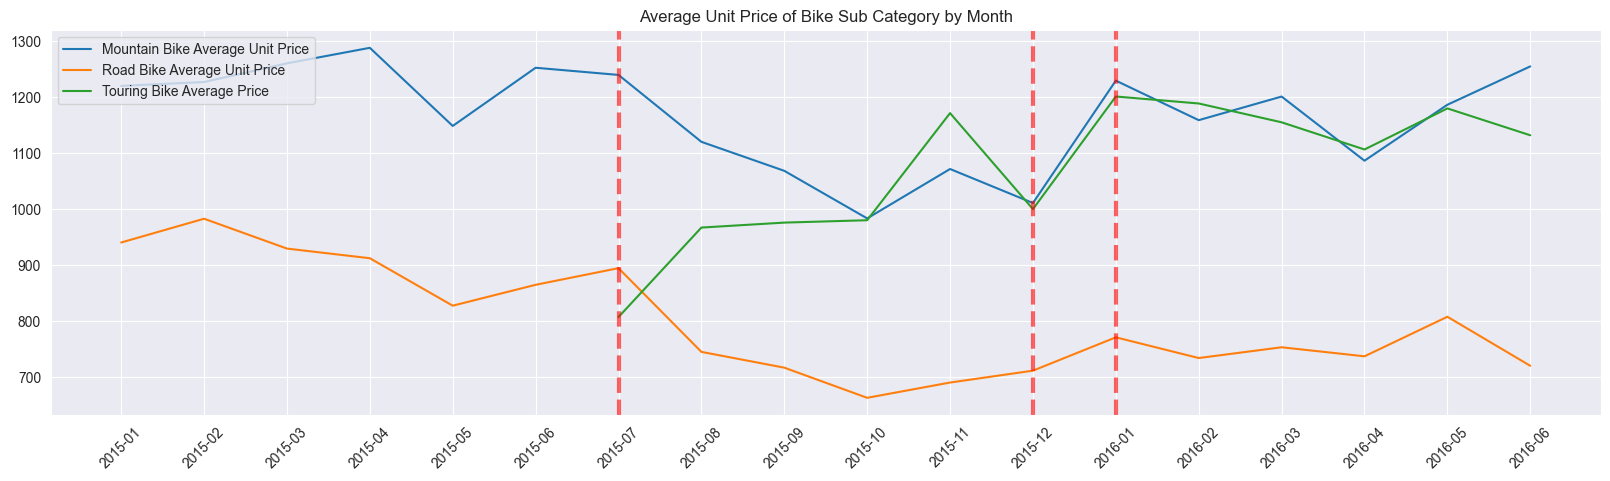

In [89]:
plt.figure()
plt.plot(mt_bike_avg_p,label='Mountain Bike Average Unit Price')
plt.plot(rd_bike_avg_p,label='Road Bike Average Unit Price')
plt.plot(tr_bike_avg_p,label='Touring Bike Average Price')
plt.legend(loc=2)
plt.title('Average Unit Price of Bike Sub Category by Month')
plt.xticks(rotation=45)
plt.axvline(x='2015-12',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2016-01',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2015-07',color='red',lw=3,ls='--',alpha=0.6)
plt.show()

-  **It seems the decreasenin cost was passed on to constumers through pricing for Mountain bikes and road bikes by the decrease noted in pricing by almost the same amount of 23%**
-  **Pricing for Touring bikes tracks similarly to the pricing of Mountain bikes after 10/2015**

##### Analyzing Unit Profit and Price of Bike Category by Country

In [345]:
BIKES=bikes_123.loc[bikes_123['Year_Month'].between('2015-12', '2016-01')]
BIKES.sort_values(by='Country')

,Year_Month,Country,Unit_Profit
44,2015-12,France,-74.440348
48,2016-01,France,68.593939
45,2015-12,Germany,129.322094
49,2016-01,Germany,274.547802
46,2015-12,United Kingdom,-39.888221
50,2016-01,United Kingdom,59.900725
47,2015-12,United States,-72.387450
51,2016-01,United States,42.084072


In [93]:
sales_bikes=bike_sales[bike_sales['Product_Category']=='Bikes']
us_bike_avg_p=sales_bikes[sales_bikes['Country']=='United States'].groupby('Year_Month').Unit_Price.mean()
ger_bike_avg_p=sales_bikes[sales_bikes['Country']=='Germany'].groupby('Year_Month').Unit_Price.mean()
uk_bike_avg_p=sales_bikes[sales_bikes['Country']=='United Kingdom'].groupby('Year_Month').Unit_Price.mean()
fr_bike_avg_p=sales_bikes[sales_bikes['Country']=='France'].groupby('Year_Month').Unit_Price.mean()

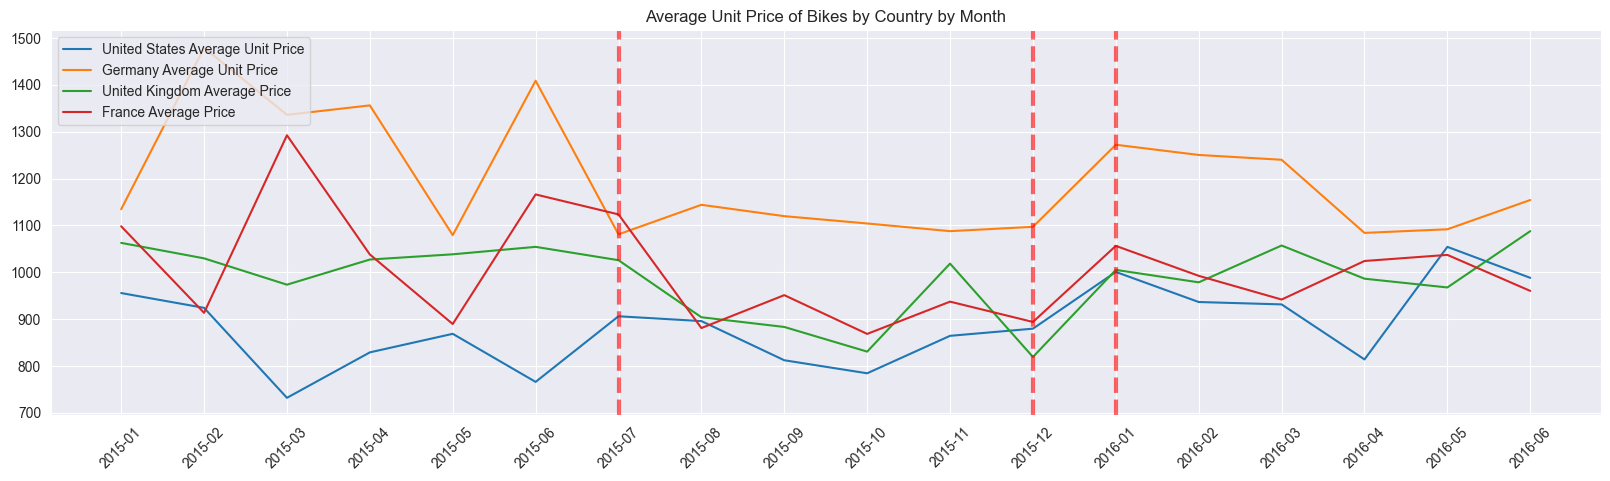

In [94]:
plt.figure()
plt.plot(us_bike_avg_p,label='United States Average Unit Price')
plt.plot(ger_bike_avg_p,label='Germany Average Unit Price')
plt.plot(uk_bike_avg_p,label='United Kingdom Average Price')
plt.plot(fr_bike_avg_p,label='France Average Price')
plt.legend(loc=2)
plt.title('Average Unit Price of Bikes by Country by Month')
plt.xticks(rotation=45)
plt.axvline(x='2015-12',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2016-01',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2015-07',color='red',lw=3,ls='--',alpha=0.6)
plt.show()

In [113]:
us_bike_avg=sales_bikes[sales_bikes['Country']=='United States'].groupby('Year_Month').Unit_Profit.mean()
ger_bike_avg=sales_bikes[sales_bikes['Country']=='Germany'].groupby('Year_Month').Unit_Profit.mean()
uk_bike_avg=sales_bikes[sales_bikes['Country']=='United Kingdom'].groupby('Year_Month').Unit_Profit.mean()
fr_bike_avg=sales_bikes[sales_bikes['Country']=='France'].groupby('Year_Month').Unit_Profit.mean()

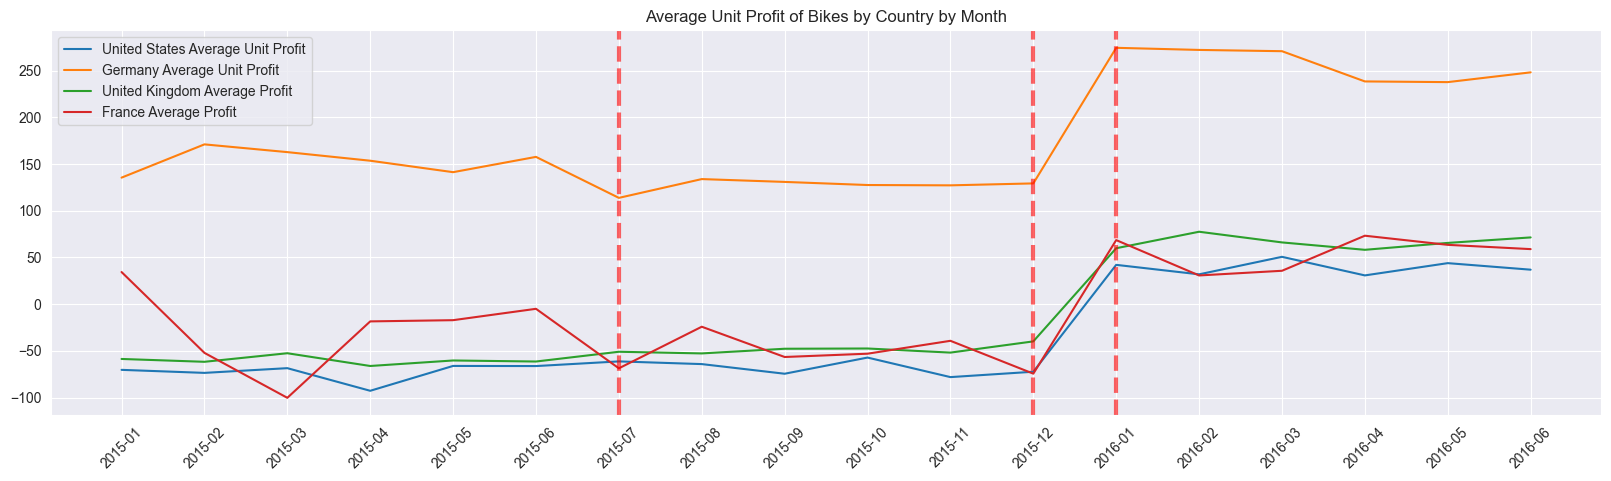

In [114]:
plt.figure()
plt.plot(us_bike_avg,label='United States Average Unit Profit')
plt.plot(ger_bike_avg,label='Germany Average Unit Profit')
plt.plot(uk_bike_avg,label='United Kingdom Average Profit')
plt.plot(fr_bike_avg,label='France Average Profit')
plt.legend(loc=2)
plt.title('Average Unit Profit of Bikes by Country by Month')
plt.xticks(rotation=45)
plt.axvline(x='2015-12',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2016-01',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2015-07',color='red',lw=3,ls='--',alpha=0.6)
plt.show()

In [116]:
sales_access=bike_sales[bike_sales['Product_Category']=='Accessories']
us_access_avg_p=sales_access[sales_access['Country']=='United States'].groupby('Year_Month').Unit_Price.mean()
ger_access_avg_p=sales_access[sales_access['Country']=='Germany'].groupby('Year_Month').Unit_Price.mean()
uk_access_avg_p=sales_access[sales_access['Country']=='United Kingdom'].groupby('Year_Month').Unit_Price.mean()
fr_access_avg_p=sales_access[sales_access['Country']=='France'].groupby('Year_Month').Unit_Price.mean()

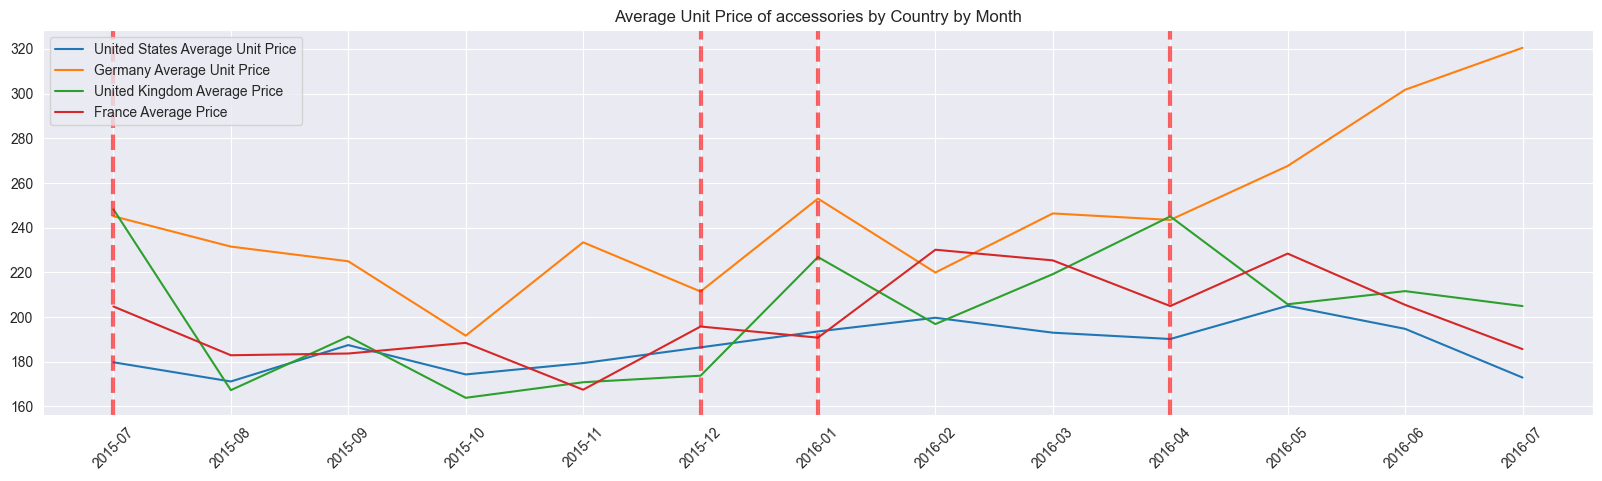

In [97]:
plt.figure()
plt.plot(us_access_avg_p,label='United States Average Unit Price')
plt.plot(ger_access_avg_p,label='Germany Average Unit Price')
plt.plot(uk_access_avg_p,label='United Kingdom Average Price')
plt.plot(fr_access_avg_p,label='France Average Price')
plt.legend(loc=2)
plt.title('Average Unit Price of accessories by Country by Month')
plt.xticks(rotation=45)
plt.axvline(x='2015-12',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2016-01',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2015-07',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2016-04',color='red',lw=3,ls='--',alpha=0.6)
plt.show()

In [117]:
us_access_avg=sales_access[sales_access['Country']=='United States'].groupby('Year_Month').Unit_Profit.mean()
ger_access_avg=sales_access[sales_access['Country']=='Germany'].groupby('Year_Month').Unit_Profit.mean()
uk_access_avg=sales_access[sales_access['Country']=='United Kingdom'].groupby('Year_Month').Unit_Profit.mean()
fr_access_avg=sales_access[sales_access['Country']=='France'].groupby('Year_Month').Unit_Profit.mean()

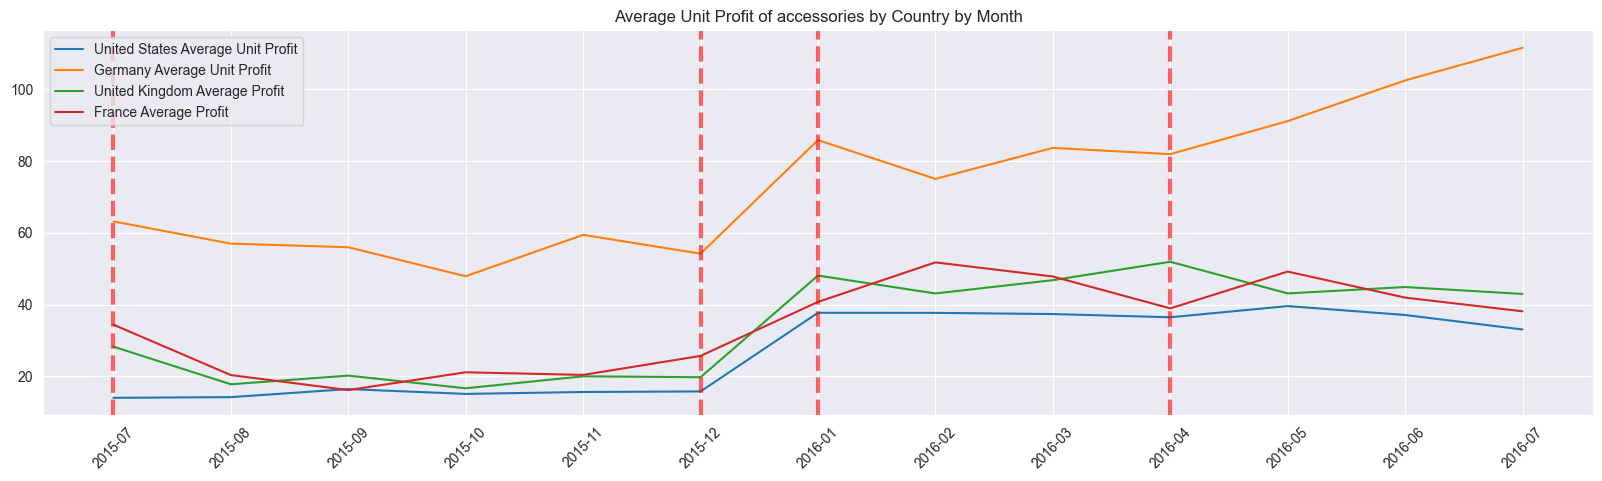

In [118]:
plt.figure()
plt.plot(us_access_avg,label='United States Average Unit Profit')
plt.plot(ger_access_avg,label='Germany Average Unit Profit')
plt.plot(uk_access_avg,label='United Kingdom Average Profit')
plt.plot(fr_access_avg,label='France Average Profit')
plt.legend(loc=2)
plt.title('Average Unit Profit of accessories by Country by Month')
plt.xticks(rotation=45)
plt.axvline(x='2015-12',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2016-01',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2015-07',color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x='2016-04',color='red',lw=3,ls='--',alpha=0.6)
plt.show()

In [126]:
bike_sales.groupby(['Country', 'Year']).Unit_Profit.mean()

Country         Year  
France          2015.0      2.969638
                2016.0     50.551104
Germany         2015.0     83.304887
                2016.0    133.949168
United Kingdom  2015.0      1.445574
                2016.0     54.421801
United States   2015.0     -1.556528
                2016.0     43.019016
Name: Unit_Profit, dtype: float64

-  **Taking a closer look at Unit_Profit accross all products, Germany has the highest Unit Profit accounting for 48% of all profit**
-  **analyzing product categories, Bikes and accesories Both Unit Prices and Profit is significantly higher in Germany than all the other three countries**
-  **Accessory Unit prices are increase after 04/2016 and accrodingly Unit Profit also increases after that time**
-  **Given that Revenue is highest in the United states and Gross Profit is only second to Germany, focusing on this market and mirroring the strategy used in Germany is the best way to maximize profit margin.**
-  **Given the company has tried price adjustments in 07/2015 and 12/2016 which resulted in an increase in revenue and gross profit, it is important to explore profit maximizing opportunities in accessories.**
-  **Given they are the top source of gross profit, there is still room to grow**


#### Modeling to see how much to  increase Unit_Price of the top two sources of gross profit (Helmets and Tires&Tubes sub-categories from accessories product category) in the United states to increase profit by 20% as compared to 2016

In [279]:
sales_access_2016=sales_access.loc[(sales_access['Country']=='United States') & (sales_access['Year']==2016)]
access_tires=sales_access_2016[sales_access_2016['Sub_Category']=='Tires and Tubes']
model_fit = ols(formula="Unit_Price ~Gross_Profit ", data=access_tires)
model_fit = model_fit.fit()

a0 = model_fit.params['Intercept']
a1 = model_fit.params['Gross_Profit']
print( "Unit Price when Gross profit is 0   = {:0.4f}".format(a0) )
print( "slope = {:0.4f}".format(a1) )
print('Average Gross Profit from Tires & Tubes is', round(access_tires.Gross_Profit.mean()))
print('Average Unit_Price of Tires & Tubes is',round(access_tires.Unit_Price.mean()))


Unit Price when Gross profit is 0   = 19.7551
slope = 2.7053
Average Gross Profit from Tires & Tubes is 48
Average Unit_Price of Tires & Tubes is 149


In [273]:
def Profit(Gross):
   result =round(19.75+2.7*(1.2*Gross))
   print('Average Unit Price of Tires & Tubes sub-category needs to increase from $149 to', result, 'to increase Gross Profit by 20%')
    
Profit(48)
    

Average Unit Price of Tires & Tubes sub-category needs to increase from $149 to 175 to increase Gross Profit by 20%


In [203]:
access_helmets=sales_access_2016[sales_access_2016['Sub_Category']=='Helmets']

In [281]:
model_fit = ols(formula="Unit_Price ~Gross_Profit ", data=access_helmets)
model_fit = model_fit.fit()

a0 = model_fit.params['Intercept']
a1 = model_fit.params['Gross_Profit']
print( "Unit Price of helmets when Gross Profit is 0   = {:0.4f}".format(a0) )
print( "Slope = {:0.4f}".format(a1) )
print('Average Gross Profit from Helmets is', round(access_helmets.Gross_Profit.mean()))
print('Average Unit_Price of Helmets is',round(access_helmets.Unit_Price.mean()))


Unit Price of helmets when Gross Profit is 0   = 94.8728
Slope = 2.4468
Average Gross Profit from Helmets is 121
Average Unit_Price of Helmets is 391


In [272]:
def Profit(Gross):
   result =round(19.75+2.7*(1.2*Gross))
   print('Average Unit Price of helmets in sub-category needs to increase from $391 to', result, 'to increase Gross Profit by 20%')
    
Profit(121)

Average Unit Price of helmets in sub-category needs to increase from $391 to 412 to increase Gross Profit by 20%


### Insights

-  **Although the United States has the highest total revenue, its gross profit is only in 2nd place after Germany. If we break is down by Bike category, there is a net loss in the US even though its largest contributer to revenue is this category which indicates Cost of products is very high in the US.**
-  **Optimizing and decreasing costs especially on Bikes in the United States is a great opportunity to significantly increase Profit Margin.**
-  **Although there isn't much difference in the spending habits of customers of different genders, there is definitely a difference in spending habits through age groups**
-  **Focusing and targetting/marketing towards Age groups 30-34, 40-44 and 25-29 will help increase revenue since these are the top three spenders in all categories**
-  **Although Bikes are the argest contributor of revenue in all countries, Accessories are the largest contributor to Gross-Profit in all countries due to volume of sale.**
-  **The top sources of gross profit in all Age groups, and countries in cluding the United states are Tires7 Tubes and Helmets from the accessories product category**
-  **Drilling down on the Unit Prices, we can see increasing Average Unit Prices of hemets by 21 dollars (from 391 to 412) increases gross profits in the US by 20%**
-  **Or increasing the Average Unit Price of Tires & Tubes by 26 dollars (from 149 to 175) will increase the gross profit in the US by 20%**

